We will begin by importing our requisite libraries and reading in our dataset. Then, we will make a couple different copies of the data frame for clustering, one using primarily our numeric data, including things like units, affordable units, square footage of different land uses, etc. and another using primarily the geographic data, including things like zoning and supervisorial districts.

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN, KMeans
from sklearn.metrics import silhouette_score

In [2]:
# read in data frame
sf_dev_projs = pd.read_csv('../data/five_yr_pipeline.csv', low_memory = False)

In [3]:
# preview data frame
sf_dev_projs

,landuse,nameaddr,entitled,beststat,bestdate,units,tcocfcdate,tcocfcunits,unitsnet,pipelineunits,...,heightbul,pda,longitude,latitude,year,qtr,yearqtr,latlong,currentpolicedistricts,affordable
0,Resident,836 48TH AV,1,CONSTRUCTION,09/20/2021 11:44:06 AM,2.0,None applied,0.0,1.0,1.0,...,40-X,Richmond Corridors,-122.508817,37.772600,2022.0,Q4,2022_Q4,POINT (-122.5088171 37.7725997),8.0,0.0
1,Vacant,735 BRYANT ST,1,CONSTRUCTION,07/26/2019 12:00:00 AM,0.0,None applied,0.0,0.0,0.0,...,270-CS,Eastern Neighborhoods,-122.400848,37.776946,2022.0,Q4,2022_Q4,POINT (-122.400848374 37.7769458793),1.0,0.0
2,Resident,2626 GRIFFITH ST,1,CONSTRUCTION,10/20/2021 11:10:35 AM,1.0,None applied,0.0,1.0,1.0,...,40-X,Bayview/Southeast Neighborhoods,-122.388080,37.718621,2022.0,Q4,2022_Q4,POINT (-122.388080214 37.7186214874),2.0,0.0
3,Resident,49 SUSSEX ST,1,BP APPROVED,12/13/2019 09:43:07 AM,1.0,None applied,0.0,1.0,1.0,...,40-X,J Church and Mission Corridor,-122.433855,37.736508,2022.0,Q4,2022_Q4,POINT (-122.433855046 37.7365078557),9.0,0.0
4,Resident,1247 BOSWORTH ST,1,BP ISSUED,08/10/2022 12:00:00 AM,1.0,None applied,0.0,1.0,1.0,...,40-X,0,-122.441421,37.735635,2022.0,Q4,2022_Q4,POINT (-122.441420855 37.7356345978),9.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43197,Resident,964 - 966 OAK ST,True,BP FILED,02/09/2017 12:00:00 AM,2.0,None applied,0.0,0.0,1.0,...,Unknown,Rest of the City,NaN,NaN,2018.0,Q1,2018_Q1,"(37.7736998606, -122.43522293)",4.0,0.0
43198,Unknown,505 26TH AVE,False,PL FILED,02/01/2018 12:00:00 AM,3.0,None applied,0.0,3.0,1.0,...,Unknown,Rest of the City,NaN,NaN,2018.0,Q1,2018_Q1,"(37.7797312955, -122.485978127)",8.0,0.0
43199,Unknown,2808 FOLSOM ST,False,PL FILED,03/16/2018 12:00:00 AM,2.0,None applied,0.0,2.0,1.0,...,Unknown,Eastern Neighborhoods,NaN,NaN,2018.0,Q1,2018_Q1,"(37.7521940241, -122.414253165)",3.0,0.0
43200,CIE,327 CAPITOL AV,True,CONSTRUCTION,03/08/2018 12:00:00 AM,0.0,None applied,0.0,0.0,0.0,...,Unknown,Rest of the City,NaN,NaN,2018.0,Q1,2018_Q1,"(37.7135532116, -122.459302748)",10.0,0.0


In [4]:
# check data types
sf_dev_projs.dtypes

landuse                    object
nameaddr                   object
entitled                   object
beststat                   object
bestdate                   object
units                     float64
tcocfcdate                 object
tcocfcunits               float64
unitsnet                  float64
pipelineunits             float64
affordablenet             float64
afftarget                  object
totalgsf                  float64
netgsf                    float64
cieexist                  float64
cie                       float64
cienet                    float64
medexist                  float64
med                       float64
mednet                    float64
mipsexist                 float64
mips                      float64
mipsnet                   float64
pdrexist                  float64
pdr                       float64
pdrnet                    float64
retexist                  float64
ret                       float64
retnet                    float64
visitexist    

Before making multiple copies of our original data frame for clustering, we shall first preprocess some of the data by dropping duplicate addresses as well as columns which we will not use in any clustering model. We will then mask the data frame for only the two land uses with which we are most concerned in our analysis, residential and mixed residential. Then, we shal make two separate copies of the cleaned up and preprocessed data frame to iterate on a few clustering models.

In [5]:
# drop duplicate addresses
sf_dev_projs.drop_duplicates(subset = 'nameaddr', inplace = True)

In [6]:
# drop columns not to be used in any clustering model
sf_dev_projs.drop(columns = ['tcocfcdate', 
                             'year', 
                             'qtr', 
                             'yearqtr', 
                             'nameaddr', 
                             'bestdate',
                             'latlong'
                            ], 
                  inplace = True)

In [7]:
# check null counts
sf_dev_projs.isnull().sum().sort_values(ascending = False)

latitude                  215
longitude                 215
pd                          8
landuse                     0
hotelroomnet                0
ret                         0
retnet                      0
visitexist                  0
visit                       0
visitnet                    0
hotelroomexist              0
hotelroomprop               0
adu                         0
legalization                0
entitled                    0
sd22                        0
nhood41                     0
zoning                      0
heightbul                   0
pda                         0
currentpolicedistricts      0
retexist                    0
pdrnet                      0
pdr                         0
netgsf                      0
beststat                    0
units                       0
tcocfcunits                 0
unitsnet                    0
pipelineunits               0
affordablenet               0
afftarget                   0
totalgsf                    0
cieexist  

In [8]:
# drop nulls
sf_dev_projs.dropna(inplace = True)

In [9]:
# mask for just rows with residential land uses
resident = sf_dev_projs[sf_dev_projs['landuse'] == 'Resident']

In [10]:
# mask for ust rows with mixed residential land uses
mixedres = sf_dev_projs[sf_dev_projs['landuse'] == 'Mixres']

In [11]:
# concatenate both residential and mixed residential data frames
sf_dev_projs = pd.concat([resident, mixedres])

In [12]:
# preview new data frame with just residential and mixed residential land uses
sf_dev_projs

,landuse,entitled,beststat,units,tcocfcunits,unitsnet,pipelineunits,affordablenet,afftarget,totalgsf,...,pd,sd22,nhood41,zoning,heightbul,pda,longitude,latitude,currentpolicedistricts,affordable
0,Resident,1,CONSTRUCTION,2.0,0.0,1.0,1.0,0.0,No Affordable Housing,0.0,...,1 - Richmond,1.0,Outer Richmond,RH-2,40-X,Richmond Corridors,-122.508817,37.772600,8.0,0.0
2,Resident,1,CONSTRUCTION,1.0,0.0,1.0,1.0,0.0,No Affordable Housing,0.0,...,10 - South Bayshore,10.0,Bayview Hunters Point,RH-1,40-X,Bayview/Southeast Neighborhoods,-122.388080,37.718621,2.0,0.0
3,Resident,1,BP APPROVED,1.0,0.0,1.0,1.0,0.0,No Affordable Housing,0.0,...,7 - Central,8.0,Glen Park,RH-1,40-X,J Church and Mission Corridor,-122.433855,37.736508,9.0,0.0
4,Resident,1,BP ISSUED,1.0,0.0,1.0,1.0,0.0,No Affordable Housing,0.0,...,13 - Ingleside,7.0,West of Twin Peaks,RH-1,40-X,0,-122.441421,37.735635,9.0,0.0
5,Resident,1,CONSTRUCTION,3.0,0.0,1.0,1.0,0.0,No Affordable Housing,0.0,...,1 - Richmond,1.0,Inner Richmond,RM-1,40-X,Richmond Corridors,-122.467736,37.779177,8.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39798,Mixres,True,CONSTRUCTION,32.0,0.0,32.0,3.0,3.0,No Affordable Housing,1813.0,...,9 - South of Market,6.0,Unknown,Unknown,Unknown,Not applicable,-122.413437,37.773650,1.0,3.0
39960,Mixres,True,CONSTRUCTION,2.0,0.0,2.0,3.0,0.0,No Affordable Housing,150.0,...,11 - Bernal Heights,9.0,Unknown,Unknown,Unknown,Not applicable,-122.413614,37.738773,9.0,0.0
40981,Mixres,True,BP APPROVED,3.0,0.0,1.0,3.0,0.0,No Affordable Housing,1808.0,...,7 - Central,8.0,Unknown,Unknown,Unknown,Not applicable,-122.430431,37.751269,3.0,0.0
41190,Mixres,True,BP ISSUED,0.0,0.0,0.0,3.0,-1.0,No Affordable Housing,12900.0,...,8 - Mission,9.0,Unknown,Unknown,Unknown,Not applicable,-122.421392,37.767205,3.0,0.0


In [13]:
# create a copy of the data frame
sf_dev_num = sf_dev_projs.copy()

In [14]:
# check data types again
sf_dev_num.dtypes

landuse                    object
entitled                   object
beststat                   object
units                     float64
tcocfcunits               float64
unitsnet                  float64
pipelineunits             float64
affordablenet             float64
afftarget                  object
totalgsf                  float64
netgsf                    float64
cieexist                  float64
cie                       float64
cienet                    float64
medexist                  float64
med                       float64
mednet                    float64
mipsexist                 float64
mips                      float64
mipsnet                   float64
pdrexist                  float64
pdr                       float64
pdrnet                    float64
retexist                  float64
ret                       float64
retnet                    float64
visitexist                float64
visit                     float64
visitnet                  float64
hotelroomexist

First, there are some categorical and numerical variables which are relevant to our affordable housing problem statement regardless of which clustering model we shall be doing. Those would include land use, entitled, beststat, units, tcocfcunits, unitsnet, pipelineunits, affordablenet, afftarget, legalization, adu, longitude, latitude, and affordable. For the numerical clustering model we shall drop the zoning, districting, and geographic specific data.

In [15]:
# drop columns not used in this clustering model
sf_dev_num.drop(columns = ['pd', 'sd22', 'nhood41', 'zoning', 'heightbul', 'pda', 'currentpolicedistricts'], inplace = True)

In [16]:
# create one hot encoded variable for categorical data
sf_dev_num_1 = pd.get_dummies(sf_dev_num).astype(float)

In [17]:
# preview new data frame
sf_dev_num_1

,units,tcocfcunits,unitsnet,pipelineunits,affordablenet,totalgsf,netgsf,cieexist,cie,cienet,...,beststat_BP ISSUED,beststat_BP REINSTATED,beststat_CONSTRUCTION,beststat_PL APPROVED,beststat_PL FILED,afftarget_Extremely Very Low Income,afftarget_Low Income,afftarget_Moderate Income,afftarget_No Affordable Housing,afftarget_Very Low Income
0,2.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5,3.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39798,32.0,0.0,32.0,3.0,3.0,1813.0,-8376.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
39960,2.0,0.0,2.0,3.0,0.0,150.0,-690.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
40981,3.0,0.0,1.0,3.0,0.0,1808.0,794.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
41190,0.0,0.0,0.0,3.0,-1.0,12900.0,12900.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [18]:
# define X
X = sf_dev_num_1

In [19]:
# instantiate standard scale and fit and transform X variable
sc = StandardScaler()

X_scaled = sc.fit_transform(X)

In [20]:
# iterate through 20 values of k and append inertia score to a list
inertia_list =[]

for k in range(1, 21):
    kmeans = KMeans(n_clusters=k, n_init = 10, random_state=42)
    kmeans.fit(X_scaled)
    inertia_list.append(kmeans.inertia_)
    
inertia_list

[159299.99999999997,
 140951.92177606412,
 127922.00416517348,
 117840.92794056587,
 110587.2805318907,
 108546.32969240732,
 101049.92424693806,
 94150.76650031982,
 90249.39129729758,
 83983.59712513305,
 82558.78942373625,
 76484.2451471831,
 74409.53716422165,
 71913.18418932255,
 66320.53607826875,
 65299.79212959445,
 60824.689427690486,
 57579.51086800962,
 54248.435449979464,
 55458.523974413474]

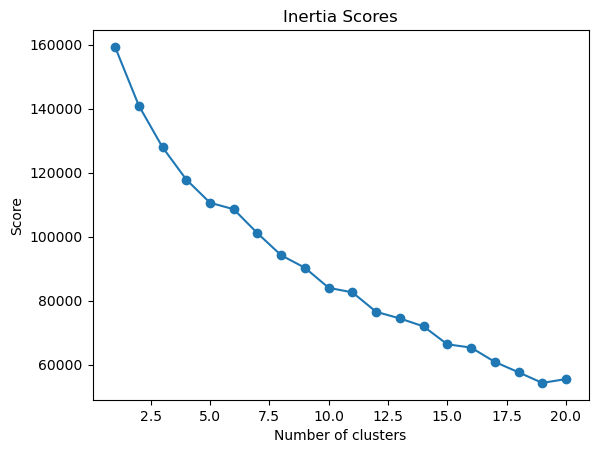

In [21]:
# plot inertia scores based on number of clusters
plt.plot(range(1, 21), inertia_list, marker = 'o')
plt.xlabel('Number of clusters')
plt.ylabel('Score')
plt.title('Inertia Scores');

In [22]:
# fit model for k = 10 and display silhouette score for comparison to DBSCAN
kmeans_10 = KMeans(n_clusters=10, n_init = 10, random_state=42)
kmeans_10.fit(X_scaled)
silhouette_score(X_scaled, kmeans_10.labels_)

0.2584252079420501

In [23]:
# instantiate and fit DBSCAN
dbscan = DBSCAN()

dbscan.fit(X_scaled);

In [24]:
# show DBSCAN labels
dbscan.labels_

array([ 0,  0,  1, ..., -1, -1, -1])

In [25]:
# get silhouette score of DBSCAN
silhouette_score(X_scaled, dbscan.labels_)

0.0901663978607581

In [26]:
# add a cluster column to data frame
sf_dev_num_1['cluster'] = dbscan.labels_

In [27]:
# show values counts of clusters
sf_dev_num_1['cluster'].value_counts()

-1     983
 0     451
 6     348
 8     346
 7     227
 2     203
 5     124
 4      81
 14     72
 3      42
 38     25
 9      23
 27     19
 36     15
 21     14
 31     14
 32     13
 20     11
 16     11
 28     11
 17     10
 13      9
 41      9
 39      8
 37      8
 22      7
 18      7
 26      7
 10      7
 1       7
 11      7
 33      6
 12      6
 15      6
 40      6
 24      5
 30      5
 29      5
 19      5
 34      5
 25      5
 42      5
 23      4
 35      4
Name: cluster, dtype: int64

At first glance, we can see that in our K-Means clustering there is no clear elbow point at which the number of clusters has a diminishing returns of inertia scores. There may be a small inflection point around 8 clusters, but the steepness of the line does not decrease substantially. In addition, when checking the silhouette score at 10 clusters, we have a score of approximately 0.26, which is not particularly compelling in terms of cluster distinction. Part of the rationale behind this clustering of 10 is that most political districting in San Franscisco is on the order of 10-15 such as supervisorial districts (11) or police districts (10). Therefore, around 10 clusters makes sense for comparing later when we use districting or neighborhood categorical data in our clustering models moving foward. Moving on, when we conducted a DBSCAN clustering model using our default parameters we did find that we got a much lower silhouette score of approximatley 0.09 than in our K-Means clustering model with 10 clusters. The DBSCAN also resulted in seemingly 42 different clusters, including 983 observations belonging to no cluster at all, the highest amount in the group of clusters.

Therefore, we shall iterate on some feature selection by dropping some features which are probably less relevant to our clustering model. First, let us try dropping all the square footage features as some of these may pertain to our mixed residential uses, but almost all pertain to our other land uses, and we can train both models again.

In [28]:
# drop extraneous columns
sf_dev_num_1.drop(columns = ['totalgsf', 
                             'netgsf', 
                             'cieexist', 
                             'cie',
                             'cienet',
                             'medexist', 
                             'med', 
                             'mednet',
                             'mipsexist',
                             'mips',
                             'mipsnet',
                             'pdrexist',
                             'pdr', 
                             'pdrnet', 
                             'retexist',
                             'ret', 
                             'retnet', 
                             'visitexist', 
                             'visit', 
                             'visitnet', 
                             'hotelroomexist',  
                             'hotelroomprop',
                             'hotelroomnet',
                             'cluster'
                            ],
                  inplace = True
                 )

In [29]:
sf_dev_num_1

,units,tcocfcunits,unitsnet,pipelineunits,affordablenet,legalization,adu,longitude,latitude,affordable,...,beststat_BP ISSUED,beststat_BP REINSTATED,beststat_CONSTRUCTION,beststat_PL APPROVED,beststat_PL FILED,afftarget_Extremely Very Low Income,afftarget_Low Income,afftarget_Moderate Income,afftarget_No Affordable Housing,afftarget_Very Low Income
0,2.0,0.0,1.0,1.0,0.0,0.0,0.0,-122.508817,37.772600,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1.0,0.0,1.0,1.0,0.0,0.0,0.0,-122.388080,37.718621,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.0,0.0,1.0,1.0,0.0,0.0,0.0,-122.433855,37.736508,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1.0,0.0,1.0,1.0,0.0,0.0,0.0,-122.441421,37.735635,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5,3.0,0.0,1.0,1.0,0.0,0.0,0.0,-122.467736,37.779177,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39798,32.0,0.0,32.0,3.0,3.0,0.0,0.0,-122.413437,37.773650,3.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
39960,2.0,0.0,2.0,3.0,0.0,0.0,0.0,-122.413614,37.738773,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
40981,3.0,0.0,1.0,3.0,0.0,0.0,0.0,-122.430431,37.751269,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
41190,0.0,0.0,0.0,3.0,-1.0,0.0,0.0,-122.421392,37.767205,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [30]:
# define X
X = sf_dev_num_1

In [31]:
# instantiate standard scale and fit and transform X variable
sc = StandardScaler()

X_scaled = sc.fit_transform(X)

In [32]:
# iterate through 20 values of k and append inertia score to a list
inertia_list =[]

for k in range(1, 21):
    kmeans = KMeans(n_clusters=k, n_init = 10, random_state=42)
    kmeans.fit(X_scaled)
    inertia_list.append(kmeans.inertia_)
    
inertia_list

[92394.00000000003,
 82183.00812082173,
 73277.82685501532,
 66067.22671373707,
 62165.99031774254,
 60235.08056340737,
 55148.807078773345,
 52744.69688857561,
 48305.34785722854,
 45119.734010574204,
 42703.334413762146,
 39036.935065211685,
 36167.364511592976,
 34063.695882487285,
 30157.988940091207,
 29057.967080764043,
 26624.116097226273,
 24580.817420091036,
 23897.500838485903,
 22022.32903855104]

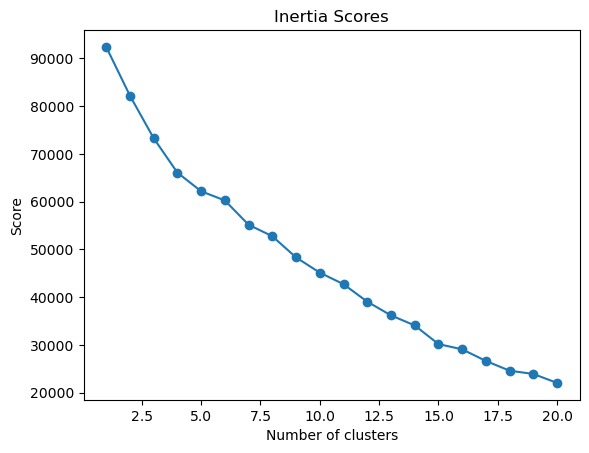

In [33]:
# plot inertia scores based on number of clusters
plt.plot(range(1, 21), inertia_list, marker = 'o')
plt.xlabel('Number of clusters')
plt.ylabel('Score')
plt.title('Inertia Scores');

In [34]:
# fit model for k = 10 and display silhouette score for comparison to DBSCAN
kmeans_10 = KMeans(n_clusters=10, n_init = 10, random_state=42)
kmeans_10.fit(X_scaled)
silhouette_score(X_scaled, kmeans_10.labels_)

0.26644274899131404

In [35]:
# instantiate and fit DBSCAN
dbscan = DBSCAN()

dbscan.fit(X_scaled);

In [36]:
# get silhouette score of DBSCAN
silhouette_score(X_scaled, dbscan.labels_)

0.14249004934377776

In [37]:
# add a cluster column to data frame
sf_dev_num_1['cluster'] = dbscan.labels_

In [38]:
# show values counts of clusters
sf_dev_num_1['cluster'].value_counts()

-1     843
 0     457
 6     351
 8     346
 7     228
 2     210
 5     127
 4      81
 14     72
 41     58
 37     44
 3      42
 38     39
 9      23
 27     19
 21     15
 39     14
 31     14
 32     13
 28     11
 20     11
 16     11
 17     10
 13      9
 11      7
 1       7
 22      7
 10      7
 44      7
 18      7
 26      7
 40      6
 36      6
 33      6
 12      6
 15      6
 43      6
 25      6
 46      5
 42      5
 34      5
 30      5
 29      5
 19      5
 45      5
 24      4
 23      4
 35      4
Name: cluster, dtype: int64

In our second iteration of the K-Means, we have improved somewhat in that our inertia scores have dropped from a low of 55K down to 22K. However, this is still very high and indicates a lot of overlapping clusters. Additionally, to compare our K-Means with 10 clusters we have a silhouette score of approximately 0.27, only slightly higher than our earlier score of 0.26. Our DBSCAN does not fare much better with a final silhouette score of 0.14. However, we still have 843 observations which were not fitted to any cluster, the largest in size still, and the number of clusters has blown up to 44 compared to 42 before.

In our next iteration, we shall go back to the original copy of the data frame and be more judicious in feature selection, trying to pare down extraneous features. For example, since units and net units might have considerable overlap or affordable and affordablenet, we shall only keep the net measures and eliminate the others, as they may be duplicative.

In [39]:
# drop extraneous columns
sf_dev_num_1.drop(columns = ['units',
                             'pipelineunits',
                             'tcocfcunits',
                             'legalization',
                             'adu',
                             'affordable',
                             'cluster'
                            ],
                  inplace = True
                 )

In [40]:
sf_dev_num_1

,unitsnet,affordablenet,longitude,latitude,landuse_Mixres,landuse_Resident,entitled_-1,entitled_0,entitled_1,entitled_False,...,beststat_BP ISSUED,beststat_BP REINSTATED,beststat_CONSTRUCTION,beststat_PL APPROVED,beststat_PL FILED,afftarget_Extremely Very Low Income,afftarget_Low Income,afftarget_Moderate Income,afftarget_No Affordable Housing,afftarget_Very Low Income
0,1.0,0.0,-122.508817,37.772600,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1.0,0.0,-122.388080,37.718621,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.0,0.0,-122.433855,37.736508,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1.0,0.0,-122.441421,37.735635,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5,1.0,0.0,-122.467736,37.779177,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39798,32.0,3.0,-122.413437,37.773650,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
39960,2.0,0.0,-122.413614,37.738773,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
40981,1.0,0.0,-122.430431,37.751269,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
41190,0.0,-1.0,-122.421392,37.767205,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [41]:
# define X
X = sf_dev_num_1

In [42]:
# instantiate standard scale and fit and transform X variable
sc = StandardScaler()

X_scaled = sc.fit_transform(X)

In [43]:
# iterate through 20 values of k and append inertia score to a list
inertia_list =[]

for k in range(1, 21):
    kmeans = KMeans(n_clusters=k, n_init = 10, random_state=42)
    kmeans.fit(X_scaled)
    inertia_list.append(kmeans.inertia_)
    
inertia_list

[73277.99999999997,
 63158.82763430155,
 57443.23773567118,
 53241.65055726153,
 49827.49694923416,
 45251.9972133438,
 42543.62271295792,
 38214.38359368442,
 35045.827376414,
 31158.499652111226,
 28223.433701365833,
 25086.71238338096,
 21917.327379609927,
 19354.337519298773,
 16725.70648882738,
 15760.369037471512,
 12845.310869535519,
 12149.843400557495,
 11466.400868326176,
 10668.40343915864]

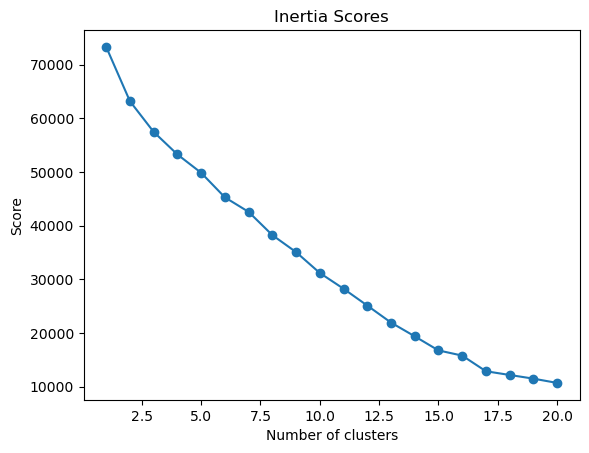

In [44]:
# plot inertia scores based on number of clusters
plt.plot(range(1, 21), inertia_list, marker = 'o')
plt.xlabel('Number of clusters')
plt.ylabel('Score')
plt.title('Inertia Scores');

In [45]:
# fit model for k = 10 and display silhouette score for comparison to DBSCAN
kmeans_10 = KMeans(n_clusters=10, n_init = 10, random_state=42)
kmeans_10.fit(X_scaled)
silhouette_score(X_scaled, kmeans_10.labels_)

0.4019744834500955

In [46]:
# instantiate and fit DBSCAN
dbscan = DBSCAN()

dbscan.fit(X_scaled);

In [47]:
# get silhouette score of DBSCAN
silhouette_score(X_scaled, dbscan.labels_)

0.3108081039383761

In [48]:
# add a cluster column to data frame
sf_dev_num_1['kmeans_cluster'] = kmeans_10.labels_

In [49]:
# show values counts of clusters
sf_dev_num_1['kmeans_cluster'].value_counts()

1    1106
2    1045
5     406
3     318
0     217
4      41
6      39
8       9
9       3
7       2
Name: kmeans_cluster, dtype: int64

In [50]:
# add a cluster column to data frame
sf_dev_num_1['dbscan_cluster'] = dbscan.labels_

In [51]:
# show values counts of clusters
sf_dev_num_1['dbscan_cluster'].value_counts()

 3     926
 0     791
-1     527
 2     278
 4     238
 24    111
 21     60
 22     42
 23     35
 1      25
 9      14
 10     11
 19     10
 5      10
 8      10
 27      9
 26      9
 7       9
 20      7
 6       7
 25      7
 14      7
 17      6
 16      6
 15      6
 18      6
 12      6
 11      5
 28      5
 13      3
Name: dbscan_cluster, dtype: int64

Our dimensional reduction and feature selection has done well to improve inertia scores and silhouette scores, and our DBSCAN includes substantially less clusters at 27. However, with a K-Means minimum inertia score at ~11K, we still have a lot of progress which could be made. The good news is that the silhouette score for the K-Means with 10 clusters is now at approximately 0.40 which is an improvement in more distinct clusters. Our DBSCAN silhouette score has also improved up to approximately 0.31, but 27 clusters is still a lot and 527 observations remain not belonging to any cluster.

We shall now return to make a second copy of our original data frame and drop many of the numerical features. We shall stick to political districting data for our main original features and then do feature selection.

In [52]:
sf_dev_geo = sf_dev_projs.copy()

In [53]:
# drop extraneous columns
sf_dev_geo.drop(columns = ['units',
                           'pipelineunits',
                           'tcocfcunits',
                           'legalization',
                           'adu',
                           'affordable',
                           'totalgsf',
                           'netgsf', 
                           'cieexist', 
                           'cie',
                           'cienet',
                           'medexist', 
                           'med',
                           'mednet',
                           'mipsexist',
                           'mips',
                           'mipsnet',
                           'pdrexist',
                           'pdr', 
                           'pdrnet', 
                           'retexist',
                           'ret', 
                           'retnet', 
                           'visitexist',
                           'visit', 
                           'visitnet', 
                           'hotelroomexist',  
                           'hotelroomprop',
                           'hotelroomnet'
                            ],
                  inplace = True
                 )

In [54]:
sf_dev_geo

,landuse,entitled,beststat,unitsnet,affordablenet,afftarget,pd,sd22,nhood41,zoning,heightbul,pda,longitude,latitude,currentpolicedistricts
0,Resident,1,CONSTRUCTION,1.0,0.0,No Affordable Housing,1 - Richmond,1.0,Outer Richmond,RH-2,40-X,Richmond Corridors,-122.508817,37.772600,8.0
2,Resident,1,CONSTRUCTION,1.0,0.0,No Affordable Housing,10 - South Bayshore,10.0,Bayview Hunters Point,RH-1,40-X,Bayview/Southeast Neighborhoods,-122.388080,37.718621,2.0
3,Resident,1,BP APPROVED,1.0,0.0,No Affordable Housing,7 - Central,8.0,Glen Park,RH-1,40-X,J Church and Mission Corridor,-122.433855,37.736508,9.0
4,Resident,1,BP ISSUED,1.0,0.0,No Affordable Housing,13 - Ingleside,7.0,West of Twin Peaks,RH-1,40-X,0,-122.441421,37.735635,9.0
5,Resident,1,CONSTRUCTION,1.0,0.0,No Affordable Housing,1 - Richmond,1.0,Inner Richmond,RM-1,40-X,Richmond Corridors,-122.467736,37.779177,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39798,Mixres,True,CONSTRUCTION,32.0,3.0,No Affordable Housing,9 - South of Market,6.0,Unknown,Unknown,Unknown,Not applicable,-122.413437,37.773650,1.0
39960,Mixres,True,CONSTRUCTION,2.0,0.0,No Affordable Housing,11 - Bernal Heights,9.0,Unknown,Unknown,Unknown,Not applicable,-122.413614,37.738773,9.0
40981,Mixres,True,BP APPROVED,1.0,0.0,No Affordable Housing,7 - Central,8.0,Unknown,Unknown,Unknown,Not applicable,-122.430431,37.751269,3.0
41190,Mixres,True,BP ISSUED,0.0,-1.0,No Affordable Housing,8 - Mission,9.0,Unknown,Unknown,Unknown,Not applicable,-122.421392,37.767205,3.0


In [55]:
# create one hot encoded variable for categorical data
sf_dev_geo_1 = pd.get_dummies(sf_dev_geo).astype(float)

In [56]:
sf_dev_geo_1

,unitsnet,affordablenet,sd22,longitude,latitude,landuse_Mixres,landuse_Resident,entitled_-1,entitled_0,entitled_1,...,currentpolicedistricts_10.0,currentpolicedistricts_2.0,currentpolicedistricts_3.0,currentpolicedistricts_4.0,currentpolicedistricts_5.0,currentpolicedistricts_6.0,currentpolicedistricts_7.0,currentpolicedistricts_8.0,currentpolicedistricts_9.0,currentpolicedistricts_Unknown
0,1.0,0.0,1.0,-122.508817,37.772600,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1.0,0.0,10.0,-122.388080,37.718621,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,8.0,-122.433855,37.736508,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1.0,0.0,7.0,-122.441421,37.735635,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5,1.0,0.0,1.0,-122.467736,37.779177,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39798,32.0,3.0,6.0,-122.413437,37.773650,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
39960,2.0,0.0,9.0,-122.413614,37.738773,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
40981,1.0,0.0,8.0,-122.430431,37.751269,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
41190,0.0,-1.0,9.0,-122.421392,37.767205,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [57]:
# define X
X = sf_dev_geo_1

In [58]:
# instantiate standard scale and fit and transform X variable
sc = StandardScaler()

X_scaled = sc.fit_transform(X)

In [59]:
# iterate through 20 values of k and append inertia score to a list
inertia_list =[]

for k in range(1, 21):
    kmeans = KMeans(n_clusters=k, n_init = 10, random_state=42)
    kmeans.fit(X_scaled)
    inertia_list.append(kmeans.inertia_)
    
inertia_list

[1115099.9999999998,
 1096986.2688858747,
 1086397.5765742783,
 1070827.5711354944,
 1066039.5186303472,
 1054982.0000205014,
 1039819.0043010536,
 1031137.3443795324,
 1019867.8869229988,
 1011213.712178258,
 999607.3827471029,
 1003802.4022831145,
 979102.6885047348,
 978780.2884357199,
 968740.8284890722,
 962399.2368944865,
 958103.2397252549,
 949987.3188786014,
 951515.2256492873,
 934467.6331630696]

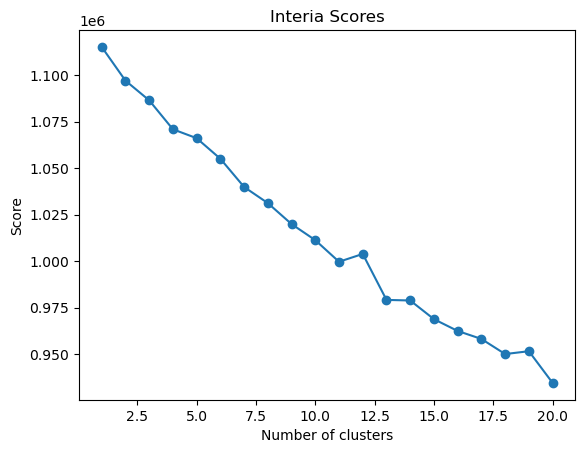

In [60]:
# plot inertia scores based on number of clusters
plt.plot(range(1, 21), inertia_list, marker = 'o')
plt.xlabel('Number of clusters')
plt.ylabel('Score')
plt.title('Interia Scores');

In [61]:
# fit model for k = 10 and display silhouette score for comparison to DBSCAN
kmeans_10 = KMeans(n_clusters=10, n_init = 10, random_state=42)
kmeans_10.fit(X_scaled)
silhouette_score(X_scaled, kmeans_10.labels_)

-0.0012380626844213482

In [62]:
# instantiate and fit DBSCAN
dbscan = DBSCAN()

dbscan.fit(X_scaled);

In [63]:
# get silhouette score of DBSCAN
silhouette_score(X_scaled, dbscan.labels_)

-0.07523411441978649

In [64]:
# add a cluster column to data frame
sf_dev_geo_1['dbscan_cluster'] = dbscan.labels_

In [65]:
# show values counts of clusters
sf_dev_geo_1['dbscan_cluster'].value_counts()

-1     2295
 5       45
 33      41
 30      37
 43      37
       ... 
 31       5
 70       5
 65       5
 69       5
 68       5
Name: dbscan_cluster, Length: 87, dtype: int64

As suspected, when we one hot encoded all the categorical features we went from 15 columns to 350. This produced the worst clustering models so with negative silhouette scores. Based on our data cleaning, we saw that some categorical features had sso many different naming conventions or multiple categories than using the column as a feature at all may prove useless in providing any clear clustering insights. Therefore, we shall iterate by returning to the original copy of the data frame and dropping nhood41, pd, pda, heightbul, and zoning.

In [66]:
# drop extraneous columns
sf_dev_geo.drop(columns = ['nhood41',
                           'pd',
                           'pda',
                           'heightbul',
                           'zoning'
                            ],
                  inplace = True
                 )

In [67]:
sf_dev_geo

,landuse,entitled,beststat,unitsnet,affordablenet,afftarget,sd22,longitude,latitude,currentpolicedistricts
0,Resident,1,CONSTRUCTION,1.0,0.0,No Affordable Housing,1.0,-122.508817,37.772600,8.0
2,Resident,1,CONSTRUCTION,1.0,0.0,No Affordable Housing,10.0,-122.388080,37.718621,2.0
3,Resident,1,BP APPROVED,1.0,0.0,No Affordable Housing,8.0,-122.433855,37.736508,9.0
4,Resident,1,BP ISSUED,1.0,0.0,No Affordable Housing,7.0,-122.441421,37.735635,9.0
5,Resident,1,CONSTRUCTION,1.0,0.0,No Affordable Housing,1.0,-122.467736,37.779177,8.0
...,...,...,...,...,...,...,...,...,...,...
39798,Mixres,True,CONSTRUCTION,32.0,3.0,No Affordable Housing,6.0,-122.413437,37.773650,1.0
39960,Mixres,True,CONSTRUCTION,2.0,0.0,No Affordable Housing,9.0,-122.413614,37.738773,9.0
40981,Mixres,True,BP APPROVED,1.0,0.0,No Affordable Housing,8.0,-122.430431,37.751269,3.0
41190,Mixres,True,BP ISSUED,0.0,-1.0,No Affordable Housing,9.0,-122.421392,37.767205,3.0


In [68]:
# create one hot encoded variable for categorical data
sf_dev_geo_2 = pd.get_dummies(sf_dev_geo).astype(float)

In [69]:
sf_dev_geo_2

,unitsnet,affordablenet,sd22,longitude,latitude,landuse_Mixres,landuse_Resident,entitled_-1,entitled_0,entitled_1,...,currentpolicedistricts_10.0,currentpolicedistricts_2.0,currentpolicedistricts_3.0,currentpolicedistricts_4.0,currentpolicedistricts_5.0,currentpolicedistricts_6.0,currentpolicedistricts_7.0,currentpolicedistricts_8.0,currentpolicedistricts_9.0,currentpolicedistricts_Unknown
0,1.0,0.0,1.0,-122.508817,37.772600,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1.0,0.0,10.0,-122.388080,37.718621,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,8.0,-122.433855,37.736508,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1.0,0.0,7.0,-122.441421,37.735635,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5,1.0,0.0,1.0,-122.467736,37.779177,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39798,32.0,3.0,6.0,-122.413437,37.773650,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
39960,2.0,0.0,9.0,-122.413614,37.738773,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
40981,1.0,0.0,8.0,-122.430431,37.751269,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
41190,0.0,-1.0,9.0,-122.421392,37.767205,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [70]:
# define X
X = sf_dev_geo_2

In [71]:
# instantiate standard scale and fit and transform X variable
sc = StandardScaler()

X_scaled = sc.fit_transform(X)

In [72]:
# iterate through 20 values of k and append inertia score to a list
inertia_list =[]

for k in range(1, 21):
    kmeans = KMeans(n_clusters=k, n_init = 10, random_state=42)
    kmeans.fit(X_scaled)
    inertia_list.append(kmeans.inertia_)
    
inertia_list

[111510.00000000001,
 101355.1490222746,
 94299.86880411606,
 89706.83447786662,
 87343.58351209755,
 82493.60840649539,
 79873.61644508787,
 77202.75292827254,
 72839.00364087852,
 69006.49831933522,
 64996.014364615454,
 63495.89613851519,
 59561.40515310862,
 56976.541086324345,
 53394.64262433313,
 50292.60840374816,
 47247.668148116325,
 44267.67621126582,
 43888.08473516699,
 42480.57020863189]

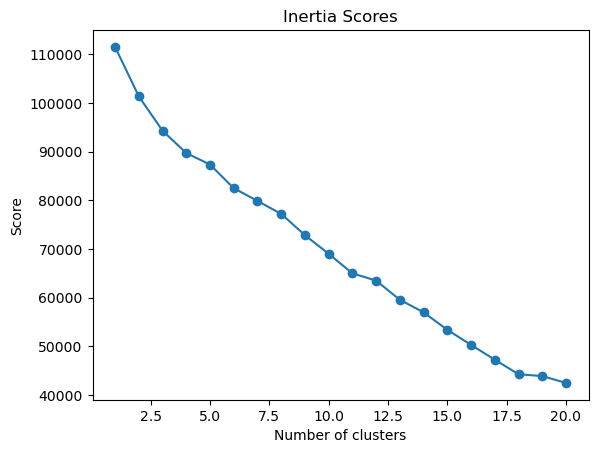

In [73]:
# plot inertia scores based on number of clusters
plt.plot(range(1, 21), inertia_list, marker = 'o')
plt.xlabel('Number of clusters')
plt.ylabel('Score')
plt.title('Inertia Scores');

In [74]:
# fit model for k = 10 and display silhouette score for comparison to DBSCAN
kmeans_10 = KMeans(n_clusters=10, n_init = 10, random_state=42)
kmeans_10.fit(X_scaled)
silhouette_score(X_scaled, kmeans_10.labels_)

0.17863836354489

In [75]:
# instantiate and fit DBSCAN
dbscan = DBSCAN()

dbscan.fit(X_scaled);

In [76]:
# get silhouette score of DBSCAN
silhouette_score(X_scaled, dbscan.labels_)

0.41463176417491193

In [77]:
# add a cluster column to data frame
sf_dev_geo_2['kmeans_cluster'] = kmeans_10.labels_

In [78]:
# show values counts of clusters
sf_dev_geo_2['kmeans_cluster'].value_counts()

7    1079
6     578
1     468
3     448
0     346
2     176
8      41
5      39
4       9
9       2
Name: kmeans_cluster, dtype: int64

In [79]:
# add a cluster column to data frame
sf_dev_geo_2['dbscan_cluster'] = dbscan.labels_

In [80]:
# show values counts of clusters
sf_dev_geo_2['dbscan_cluster'].value_counts()

-1     735
 23    125
 5     118
 0     107
 27    106
      ... 
 94      5
 91      5
 92      5
 87      5
 73      3
Name: dbscan_cluster, Length: 97, dtype: int64

Unsurprisingly, with our features reduced down to 35 from 350, we have massive improvement in inertia scores and silhouette scores, with a K-Means with 10 clusters having a silhouette score of approximately 0.18 and the DBSCAN having a silhouette score of approximately 0.41 albeit with over 90 cluster and 735 observations still belonging to no cluster. We shall use the best features of both our numerical and categorical variables in one final attempt to get one final production model for clustering. We shall temporarily drop latitude and longitude from our variables since political districts may act as a sufficient proxy for geography and neighborhoods, and we will use coordinates for our exploratory data analysis in our production model. Additionally, we will attempt to eliminate a few more extraneous features which we did not investigate during our initial data analysis such as entitled.

In [81]:
sf_dev_final = sf_dev_projs.copy()

In [82]:
sf_dev_final

,landuse,entitled,beststat,units,tcocfcunits,unitsnet,pipelineunits,affordablenet,afftarget,totalgsf,...,pd,sd22,nhood41,zoning,heightbul,pda,longitude,latitude,currentpolicedistricts,affordable
0,Resident,1,CONSTRUCTION,2.0,0.0,1.0,1.0,0.0,No Affordable Housing,0.0,...,1 - Richmond,1.0,Outer Richmond,RH-2,40-X,Richmond Corridors,-122.508817,37.772600,8.0,0.0
2,Resident,1,CONSTRUCTION,1.0,0.0,1.0,1.0,0.0,No Affordable Housing,0.0,...,10 - South Bayshore,10.0,Bayview Hunters Point,RH-1,40-X,Bayview/Southeast Neighborhoods,-122.388080,37.718621,2.0,0.0
3,Resident,1,BP APPROVED,1.0,0.0,1.0,1.0,0.0,No Affordable Housing,0.0,...,7 - Central,8.0,Glen Park,RH-1,40-X,J Church and Mission Corridor,-122.433855,37.736508,9.0,0.0
4,Resident,1,BP ISSUED,1.0,0.0,1.0,1.0,0.0,No Affordable Housing,0.0,...,13 - Ingleside,7.0,West of Twin Peaks,RH-1,40-X,0,-122.441421,37.735635,9.0,0.0
5,Resident,1,CONSTRUCTION,3.0,0.0,1.0,1.0,0.0,No Affordable Housing,0.0,...,1 - Richmond,1.0,Inner Richmond,RM-1,40-X,Richmond Corridors,-122.467736,37.779177,8.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39798,Mixres,True,CONSTRUCTION,32.0,0.0,32.0,3.0,3.0,No Affordable Housing,1813.0,...,9 - South of Market,6.0,Unknown,Unknown,Unknown,Not applicable,-122.413437,37.773650,1.0,3.0
39960,Mixres,True,CONSTRUCTION,2.0,0.0,2.0,3.0,0.0,No Affordable Housing,150.0,...,11 - Bernal Heights,9.0,Unknown,Unknown,Unknown,Not applicable,-122.413614,37.738773,9.0,0.0
40981,Mixres,True,BP APPROVED,3.0,0.0,1.0,3.0,0.0,No Affordable Housing,1808.0,...,7 - Central,8.0,Unknown,Unknown,Unknown,Not applicable,-122.430431,37.751269,3.0,0.0
41190,Mixres,True,BP ISSUED,0.0,0.0,0.0,3.0,-1.0,No Affordable Housing,12900.0,...,8 - Mission,9.0,Unknown,Unknown,Unknown,Not applicable,-122.421392,37.767205,3.0,0.0


In [83]:
# drop extraneous columns
sf_dev_final.drop(columns = ['units',
                           'pipelineunits',
                           'tcocfcunits',
                           'legalization',
                           'adu',
                           'affordable',
                           'totalgsf',
                           'netgsf', 
                           'cieexist', 
                           'cie',
                           'cienet',
                           'medexist', 
                           'med',
                           'mednet',
                           'mipsexist',
                           'mips',
                           'mipsnet',
                           'pdrexist',
                           'pdr', 
                           'pdrnet', 
                           'retexist',
                           'ret', 
                           'retnet', 
                           'visitexist',
                           'visit', 
                           'visitnet', 
                           'hotelroomexist',  
                           'hotelroomprop',
                           'hotelroomnet',
                           'nhood41',
                           'pd',
                           'pda',
                           'heightbul',
                           'zoning',
                           'entitled'
                            ],
                  inplace = True
                 )

In [84]:
sf_dev_final

,landuse,beststat,unitsnet,affordablenet,afftarget,sd22,longitude,latitude,currentpolicedistricts
0,Resident,CONSTRUCTION,1.0,0.0,No Affordable Housing,1.0,-122.508817,37.772600,8.0
2,Resident,CONSTRUCTION,1.0,0.0,No Affordable Housing,10.0,-122.388080,37.718621,2.0
3,Resident,BP APPROVED,1.0,0.0,No Affordable Housing,8.0,-122.433855,37.736508,9.0
4,Resident,BP ISSUED,1.0,0.0,No Affordable Housing,7.0,-122.441421,37.735635,9.0
5,Resident,CONSTRUCTION,1.0,0.0,No Affordable Housing,1.0,-122.467736,37.779177,8.0
...,...,...,...,...,...,...,...,...,...
39798,Mixres,CONSTRUCTION,32.0,3.0,No Affordable Housing,6.0,-122.413437,37.773650,1.0
39960,Mixres,CONSTRUCTION,2.0,0.0,No Affordable Housing,9.0,-122.413614,37.738773,9.0
40981,Mixres,BP APPROVED,1.0,0.0,No Affordable Housing,8.0,-122.430431,37.751269,3.0
41190,Mixres,BP ISSUED,0.0,-1.0,No Affordable Housing,9.0,-122.421392,37.767205,3.0


In [85]:
# create one hot encoded variable for categorical data
sf_dev_final_1 = pd.get_dummies(sf_dev_final).astype(float)

In [86]:
sf_dev_final_1

,unitsnet,affordablenet,sd22,longitude,latitude,landuse_Mixres,landuse_Resident,beststat_BP APPROVED,beststat_BP FILED,beststat_BP ISSUED,...,currentpolicedistricts_10.0,currentpolicedistricts_2.0,currentpolicedistricts_3.0,currentpolicedistricts_4.0,currentpolicedistricts_5.0,currentpolicedistricts_6.0,currentpolicedistricts_7.0,currentpolicedistricts_8.0,currentpolicedistricts_9.0,currentpolicedistricts_Unknown
0,1.0,0.0,1.0,-122.508817,37.772600,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1.0,0.0,10.0,-122.388080,37.718621,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,8.0,-122.433855,37.736508,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1.0,0.0,7.0,-122.441421,37.735635,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5,1.0,0.0,1.0,-122.467736,37.779177,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39798,32.0,3.0,6.0,-122.413437,37.773650,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
39960,2.0,0.0,9.0,-122.413614,37.738773,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
40981,1.0,0.0,8.0,-122.430431,37.751269,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
41190,0.0,-1.0,9.0,-122.421392,37.767205,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [87]:
# define X
X = sf_dev_final_1.drop(columns = ['longitude', 'latitude'])

In [88]:
# instantiate standard scale and fit and transform X variable
sc = StandardScaler()

X_scaled = sc.fit_transform(X)

In [89]:
# iterate through 20 values of k and append inertia score to a list
inertia_list =[]

for k in range(1, 21):
    kmeans = KMeans(n_clusters=k, n_init = 10, random_state=42)
    kmeans.fit(X_scaled)
    inertia_list.append(kmeans.inertia_)
    
inertia_list

[89207.99999999999,
 81599.53731426926,
 77167.55299250405,
 74011.72015207156,
 70091.32847308838,
 67142.04521851733,
 63648.109490988936,
 58375.205548211496,
 55525.89367949405,
 51778.870508507265,
 48004.79654617554,
 44156.691551344215,
 41297.78769125812,
 37218.712339772974,
 34252.18623082404,
 31418.19136639485,
 29026.780819933003,
 27286.36169894118,
 27438.930231305698,
 24490.017368707748]

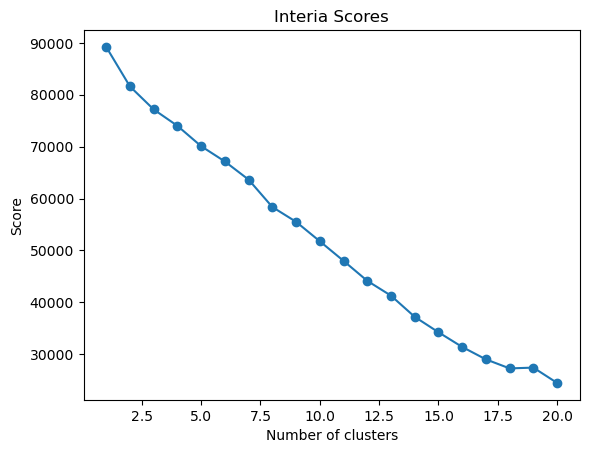

In [90]:
# plot inertia scores based on number of clusters
plt.plot(range(1, 21), inertia_list, marker = 'o')
plt.xlabel('Number of clusters')
plt.ylabel('Score')
plt.title('Interia Scores');

In [91]:
# fit model for k = 10 and display silhouette score for comparison to DBSCAN
kmeans_10 = KMeans(n_clusters=10, n_init = 10, random_state=42)
kmeans_10.fit(X_scaled)
silhouette_score(X_scaled, kmeans_10.labels_)

0.2993022373051002

In [92]:
# instantiate and fit DBSCAN
dbscan = DBSCAN()

dbscan.fit(X_scaled);

In [93]:
# get silhouette score of DBSCAN
silhouette_score(X_scaled, dbscan.labels_)

0.7542941215403887

In [94]:
# add a cluster column to data frame
sf_dev_final_1['kmeans_cluster'] = kmeans_10.labels_

In [95]:
# show values counts of clusters
sf_dev_final_1['kmeans_cluster'].value_counts()

7    578
3    576
1    560
4    405
6    347
9    260
0    241
2    176
5     41
8      2
Name: kmeans_cluster, dtype: int64

In [96]:
# add a cluster column to data frame
sf_dev_final_1['dbscan_cluster'] = dbscan.labels_

In [97]:
# show values counts of clusters
sf_dev_final_1['dbscan_cluster'].value_counts()

-1     386
 13    194
 15    171
 23    141
 0     118
      ... 
 93      5
 94      5
 66      5
 8       5
 64      5
Name: dbscan_cluster, Length: 99, dtype: int64

This iteration of our final production model has produced the best silhouette scores so far, with approximately 0.30 in our K-Means with 10 clusters and approximately 0.75 in our DBSCAN. The DBSCAN is still producing over 90 clusters with 386 observations in no cluster. Our strictly numerical clustering model with a k value of 10 in our K-Means produced a silhouette score of ~0.40. We shall make one final attempt to iterate by eliminating the currentpolicedistrict feature since this is probably closely correlated with the supervisorial districts.

In [98]:
sf_dev_final.drop(columns = 'currentpolicedistricts', inplace = True)

In [99]:
# create one hot encoded variable for categorical data
sf_dev_final_2 = pd.get_dummies(sf_dev_final).astype(float)

In [100]:
sf_dev_final_2

,unitsnet,affordablenet,sd22,longitude,latitude,landuse_Mixres,landuse_Resident,beststat_BP APPROVED,beststat_BP FILED,beststat_BP ISSUED,beststat_BP REINSTATED,beststat_CONSTRUCTION,beststat_PL APPROVED,beststat_PL FILED,afftarget_Extremely Very Low Income,afftarget_Low Income,afftarget_Moderate Income,afftarget_No Affordable Housing,afftarget_Very Low Income
0,1.0,0.0,1.0,-122.508817,37.772600,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1.0,0.0,10.0,-122.388080,37.718621,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.0,0.0,8.0,-122.433855,37.736508,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1.0,0.0,7.0,-122.441421,37.735635,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5,1.0,0.0,1.0,-122.467736,37.779177,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39798,32.0,3.0,6.0,-122.413437,37.773650,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
39960,2.0,0.0,9.0,-122.413614,37.738773,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
40981,1.0,0.0,8.0,-122.430431,37.751269,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
41190,0.0,-1.0,9.0,-122.421392,37.767205,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [101]:
# define X
X = sf_dev_final_2.drop(columns = ['longitude', 'latitude'])

In [102]:
# instantiate standard scale and fit and transform X variable
sc = StandardScaler()

X_scaled = sc.fit_transform(X)

In [103]:
# iterate through 20 values of k and append inertia score to a list
inertia_list =[]

for k in range(1, 21):
    kmeans = KMeans(n_clusters=k, n_init = 10, random_state=42)
    kmeans.fit(X_scaled)
    inertia_list.append(kmeans.inertia_)
    
inertia_list

[54161.999999999985,
 46887.91137560726,
 42700.867099546915,
 38683.88148796259,
 35883.583856725454,
 31670.821150489282,
 27987.379751906206,
 24002.47682943394,
 20488.051578923372,
 17239.7837452255,
 14196.865240918436,
 11167.816562639642,
 8376.093359023102,
 7604.71601352903,
 6802.9835974222215,
 6032.032702373358,
 5430.602958835052,
 4687.805945509339,
 4157.970916323654,
 3841.864248142623]

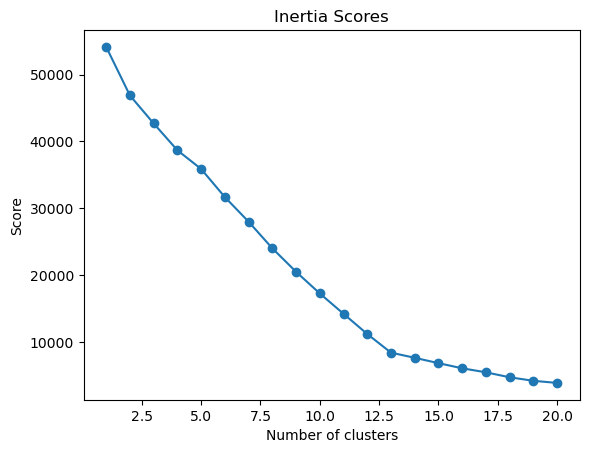

In [104]:
# plot inertia scores based on number of clusters
plt.plot(range(1, 21), inertia_list, marker = 'o')
plt.xlabel('Number of clusters')
plt.ylabel('Score')
plt.title('Inertia Scores');

In [105]:
# fit model for k = 10 and display silhouette score for comparison to DBSCAN
kmeans_10 = KMeans(n_clusters=10, n_init = 10, random_state=42)
kmeans_10.fit(X_scaled)
silhouette_score(X_scaled, kmeans_10.labels_)

0.4940104013157269

In [106]:
# instantiate and fit DBSCAN
dbscan = DBSCAN()

dbscan.fit(X_scaled);

In [107]:
# get silhouette score of DBSCAN
silhouette_score(X_scaled, dbscan.labels_)

0.5906472457111334

In [108]:
# add a cluster column to data frame
sf_dev_final_2['kmeans_cluster'] = kmeans_10.labels_

In [109]:
# show values counts of clusters
sf_dev_final_2['kmeans_cluster'].value_counts()

5    1006
0     883
1     485
8     401
6     317
2      41
3      39
9       9
7       3
4       2
Name: kmeans_cluster, dtype: int64

In [110]:
# add a cluster column to data frame
sf_dev_final_2['dbscan_cluster'] = dbscan.labels_

In [111]:
# show values counts of clusters
sf_dev_final_2['dbscan_cluster'].value_counts()

 3     993
 0     872
 2     332
 4     243
-1     194
 10    136
 7     101
 1      73
 8      61
 9      58
 5      57
 13     24
 6      18
 11      8
 12      8
 14      8
Name: dbscan_cluster, dtype: int64

We have successfully reduced our number of features down to 19 in total, including some numerical and categorical features. Our K-Means model with 10 clusters is now performing at a silhouette score of ~0.49 which is the best K-Means score yet. Additionally, our DBSCAN has improved dramatically with 14 distinct clusters, a silhouette score of approximately 0.59, and only 194 observations not belonging to any cluster. One important observation though is with these final features in our production model we now have a clear elbow point in our plot of inertia values for K-Means clustering at 13 clusters. This comparable to the 14 clusters which we are seeing in DBSCAN. Therefore, we fit one final K-Means model with 13 clusters before conducting our exploratory data analysis on our final production model.

In [112]:
# fit model for k = 13 and display silhouette score for comparison to DBSCAN
kmeans_13 = KMeans(n_clusters=13, n_init = 10, random_state=42)
kmeans_13.fit(X_scaled)
silhouette_score(X_scaled, kmeans_13.labels_)

0.5894424862677885

In [113]:
# add a cluster column to data frame
sf_dev_final_2['kmeans_cluster'] = kmeans_13.labels_

In [114]:
# show values counts of clusters
sf_dev_final_2['kmeans_cluster'].value_counts()

1     1006
4      883
2      399
3      341
8      246
7      106
0      103
6       40
10      39
11       9
9        9
12       3
5        2
Name: kmeans_cluster, dtype: int64

Looking at the final silhouette score, we can see that the K-Means clustering model has a silhouette score of approximately 0.59, just slightly under the silhouette score of the DBSCAN. However since the DBSCAN still has nearly 200 observations not in any cluster, we shall use the K-Means as our final production model and conduct some exploratory data analysis.

In [115]:
sf_dev_final

,landuse,beststat,unitsnet,affordablenet,afftarget,sd22,longitude,latitude
0,Resident,CONSTRUCTION,1.0,0.0,No Affordable Housing,1.0,-122.508817,37.772600
2,Resident,CONSTRUCTION,1.0,0.0,No Affordable Housing,10.0,-122.388080,37.718621
3,Resident,BP APPROVED,1.0,0.0,No Affordable Housing,8.0,-122.433855,37.736508
4,Resident,BP ISSUED,1.0,0.0,No Affordable Housing,7.0,-122.441421,37.735635
5,Resident,CONSTRUCTION,1.0,0.0,No Affordable Housing,1.0,-122.467736,37.779177
...,...,...,...,...,...,...,...,...
39798,Mixres,CONSTRUCTION,32.0,3.0,No Affordable Housing,6.0,-122.413437,37.773650
39960,Mixres,CONSTRUCTION,2.0,0.0,No Affordable Housing,9.0,-122.413614,37.738773
40981,Mixres,BP APPROVED,1.0,0.0,No Affordable Housing,8.0,-122.430431,37.751269
41190,Mixres,BP ISSUED,0.0,-1.0,No Affordable Housing,9.0,-122.421392,37.767205


In [116]:
# add a cluster column to data frame
sf_dev_final['cluster'] = kmeans_13.labels_

In [117]:
sf_dev_final

,landuse,beststat,unitsnet,affordablenet,afftarget,sd22,longitude,latitude,cluster
0,Resident,CONSTRUCTION,1.0,0.0,No Affordable Housing,1.0,-122.508817,37.772600,4
2,Resident,CONSTRUCTION,1.0,0.0,No Affordable Housing,10.0,-122.388080,37.718621,4
3,Resident,BP APPROVED,1.0,0.0,No Affordable Housing,8.0,-122.433855,37.736508,7
4,Resident,BP ISSUED,1.0,0.0,No Affordable Housing,7.0,-122.441421,37.735635,3
5,Resident,CONSTRUCTION,1.0,0.0,No Affordable Housing,1.0,-122.467736,37.779177,4
...,...,...,...,...,...,...,...,...,...
39798,Mixres,CONSTRUCTION,32.0,3.0,No Affordable Housing,6.0,-122.413437,37.773650,2
39960,Mixres,CONSTRUCTION,2.0,0.0,No Affordable Housing,9.0,-122.413614,37.738773,2
40981,Mixres,BP APPROVED,1.0,0.0,No Affordable Housing,8.0,-122.430431,37.751269,7
41190,Mixres,BP ISSUED,0.0,-1.0,No Affordable Housing,9.0,-122.421392,37.767205,2


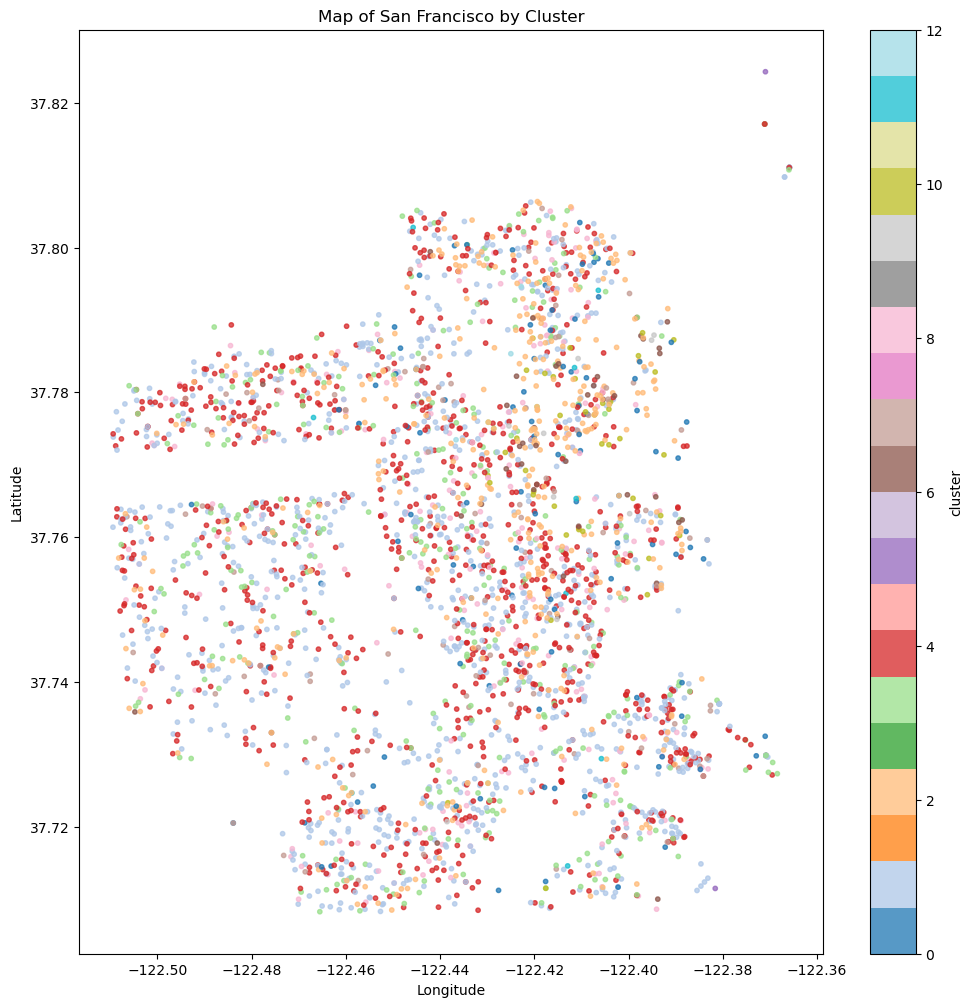

In [118]:
# display where the clusters are
sf_dev_final.plot(kind="scatter", x="longitude", y="latitude", c="cluster",
         cmap="tab20", figsize=(12, 12), s=10, alpha = 0.75)

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Map of San Francisco by Cluster');

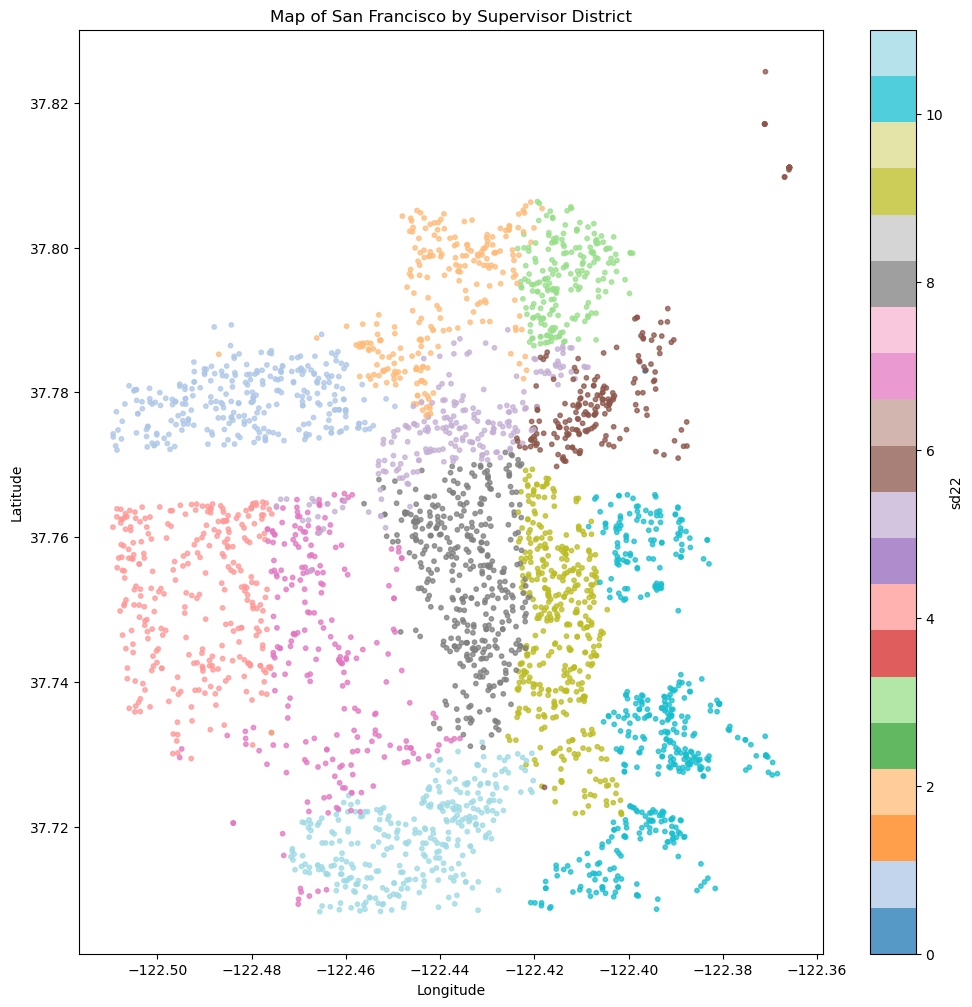

In [119]:
# display where the supervisor districts are
sf_dev_final.plot(kind="scatter", x="longitude", y="latitude", c="sd22",
         cmap="tab20", figsize=(12, 12), s=10, alpha = 0.75)

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Map of San Francisco by Supervisor District');

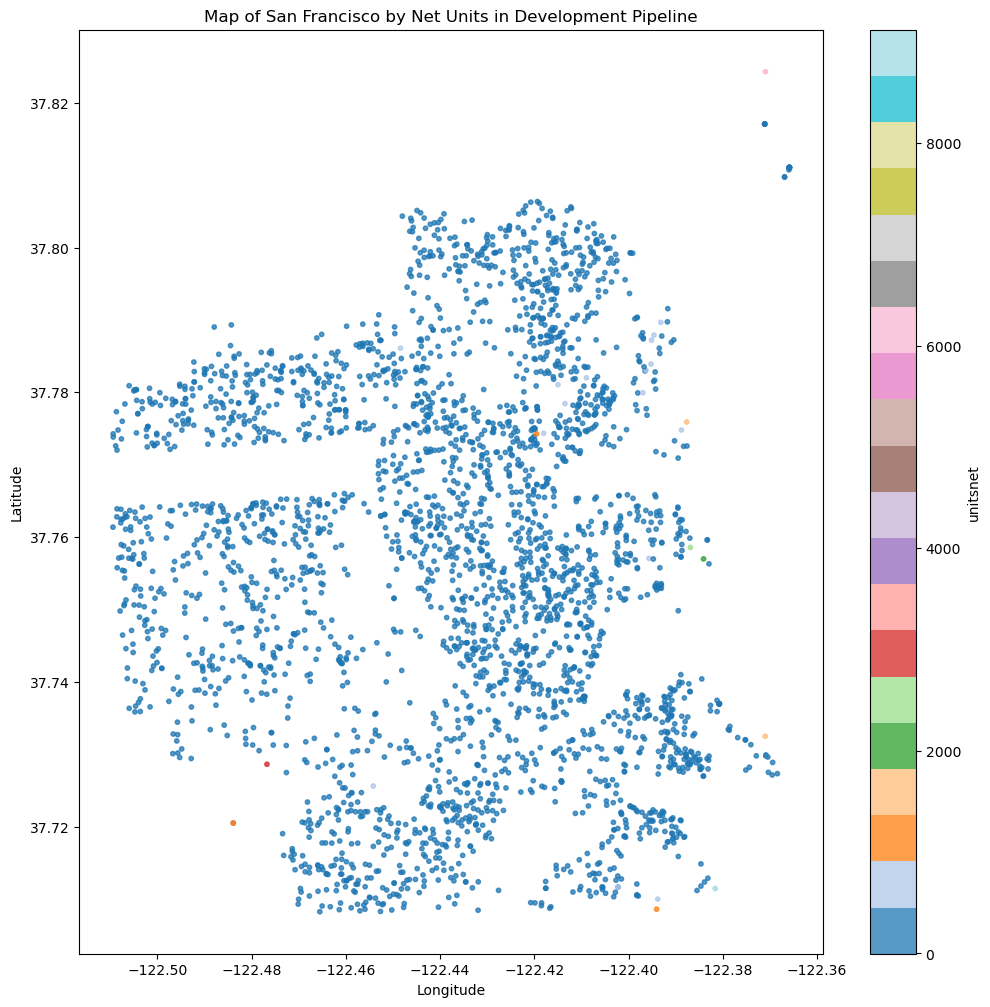

In [120]:
# displays a heatmap of the net units
sf_dev_final.plot(kind="scatter", x="longitude", y="latitude", c="unitsnet", cmap="tab20", 
                  figsize=(12, 12), s=10, alpha = 0.75)

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Map of San Francisco by Net Units in Development Pipeline');

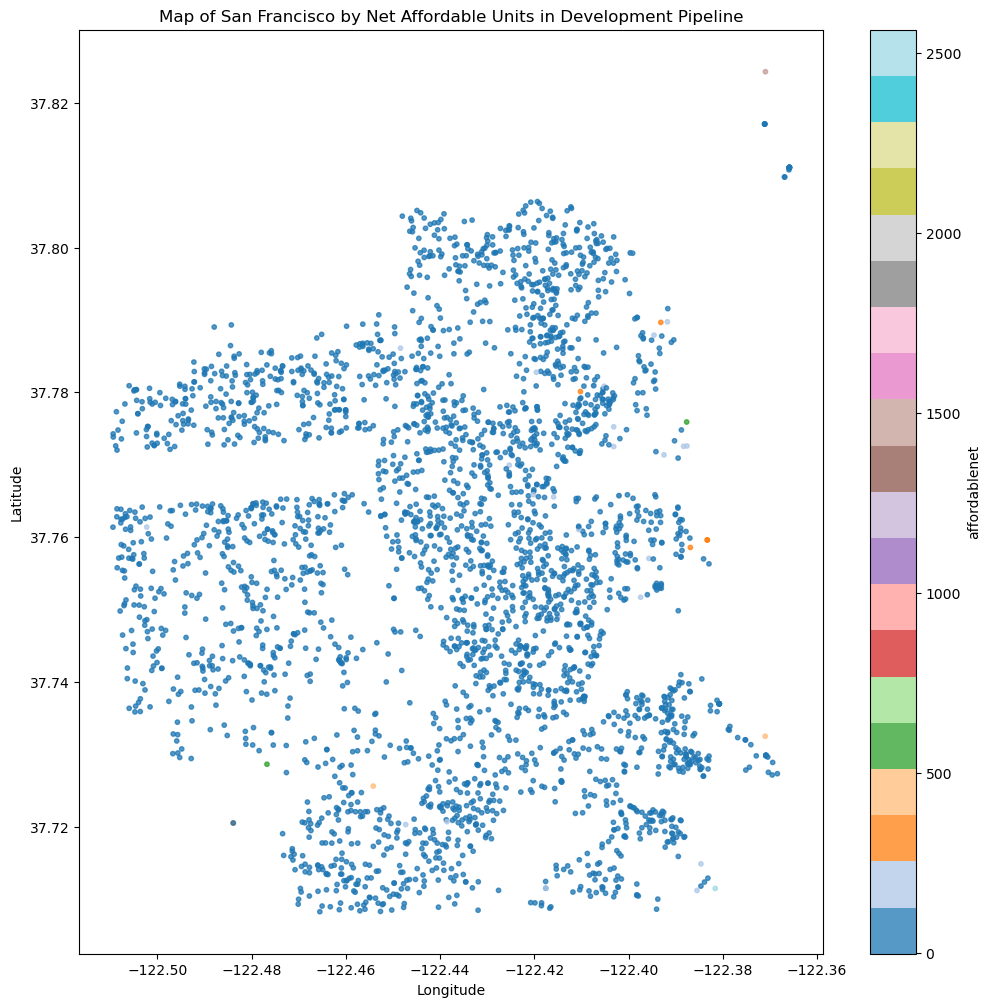

In [121]:
# displays a heat map of net affordable units
sf_dev_final.plot(kind="scatter", x="longitude", y="latitude", c="affordablenet", cmap="tab20", 
                  figsize=(12, 12), s=10, alpha = 0.75)

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Map of San Francisco by Net Affordable Units in Development Pipeline');

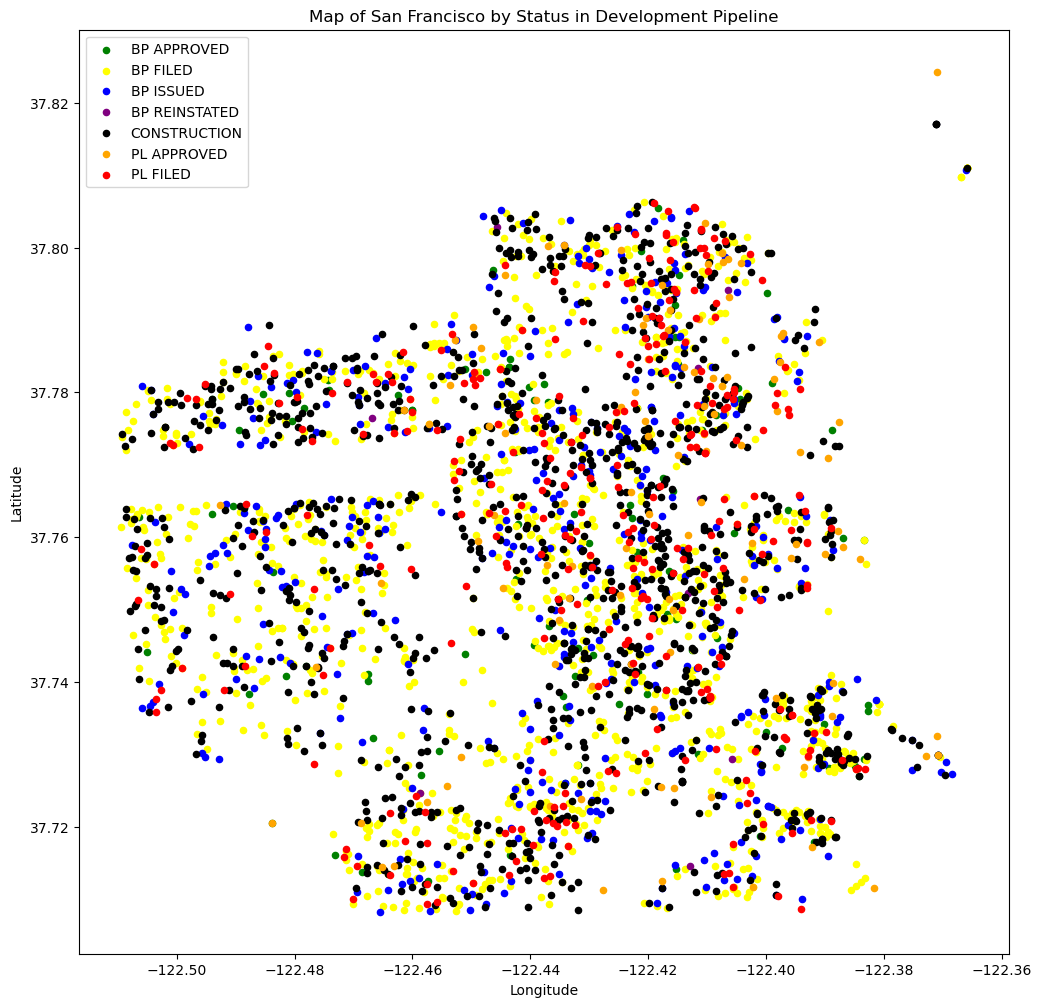

In [122]:
fig, ax = plt.subplots(figsize = (12, 12))

colors = {'PL FILED': 'red',
          'PL APPROVED': 'orange',
          'BP FILED': 'yellow',
          'BP APPROVED': 'green',
          'BP ISSUED': 'blue',
          'BP REINSTATED': 'purple',
          'CONSTRUCTION': 'black'
         }

beststat = sf_dev_final.groupby('beststat')

for key, group in beststat:
    group.plot(ax=ax, kind='scatter', x='longitude', y='latitude', label=key, color=colors[key])

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Map of San Francisco by Status in Development Pipeline')
plt.show();

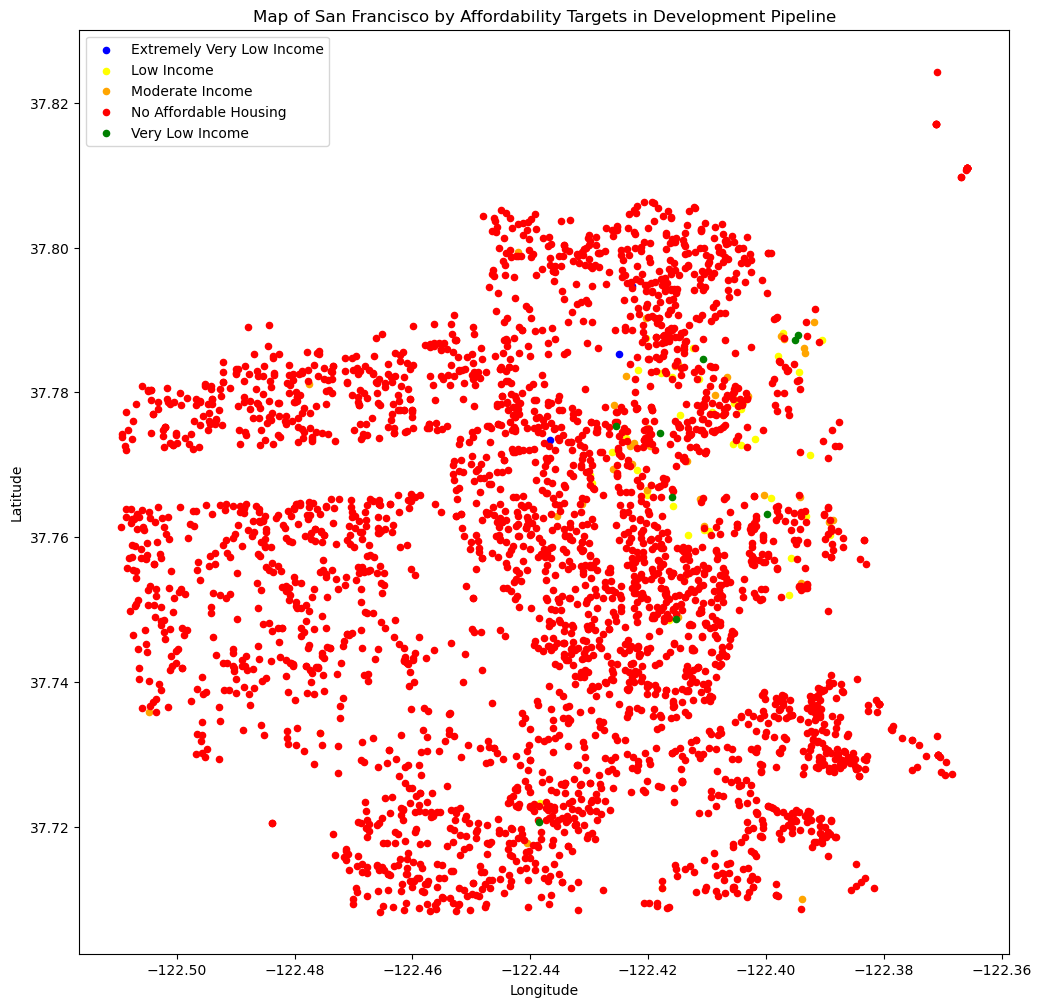

In [123]:
fig, ax = plt.subplots(figsize = (12, 12))

colors = {'No Affordable Housing': 'red',
          'Moderate Income': 'orange',
          'Low Income': 'yellow',
          'Very Low Income': 'green',
          'Extremely Very Low Income': 'blue'
         }

aff_target = sf_dev_final.groupby('afftarget')

for key, group in aff_target:
    group.plot(ax=ax, kind='scatter', x='longitude', y='latitude', label=key, color=colors[key])

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Map of San Francisco by Affordability Targets in Development Pipeline')
plt.show();

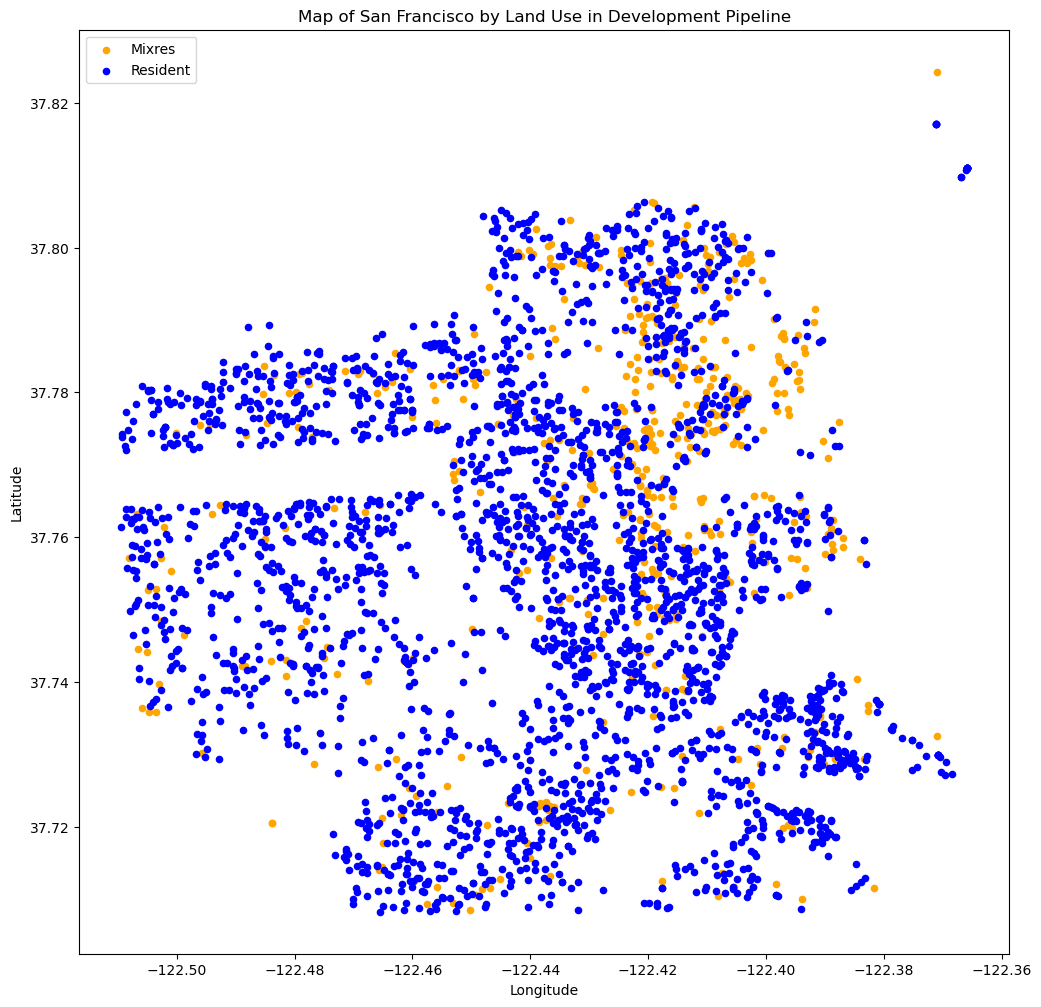

In [124]:
fig, ax = plt.subplots(figsize = (12, 12))

colors = {'Resident': 'blue',
          'Mixres': 'orange'
         }

landuse = sf_dev_final.groupby('landuse')

for key, group in landuse:
    group.plot(ax=ax, kind='scatter', x='longitude', y='latitude', label=key, color=colors[key])

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Map of San Francisco by Land Use in Development Pipeline')
plt.show();

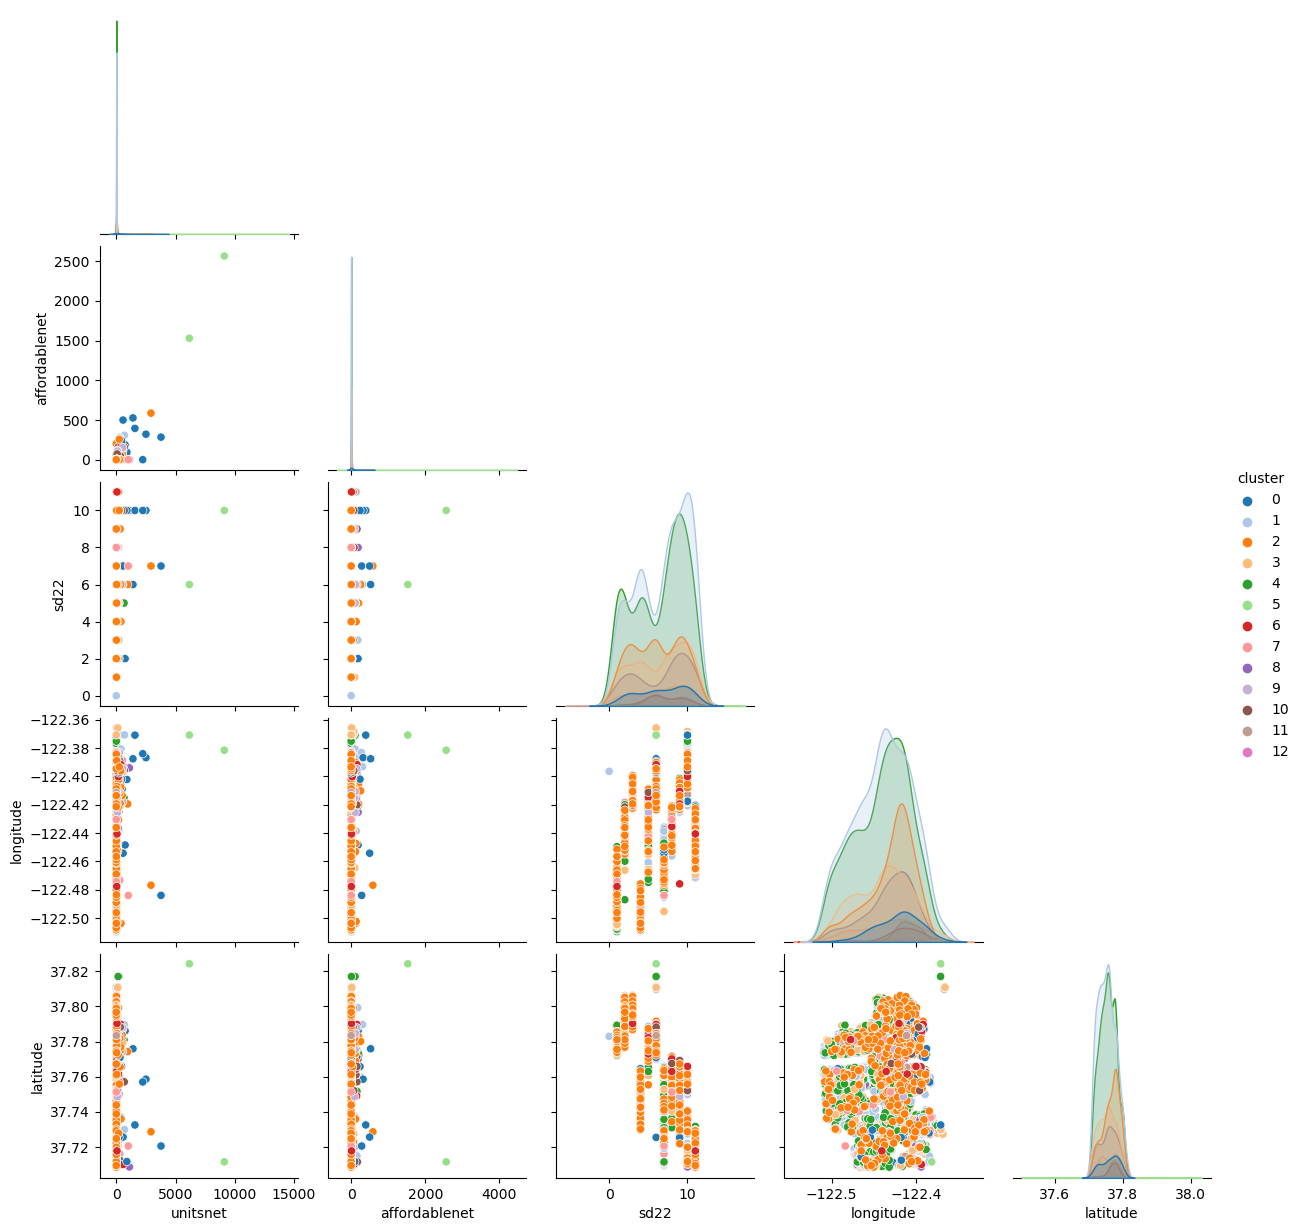

In [125]:
sns.pairplot(sf_dev_final, hue = 'cluster', palette = 'tab20', corner = True);

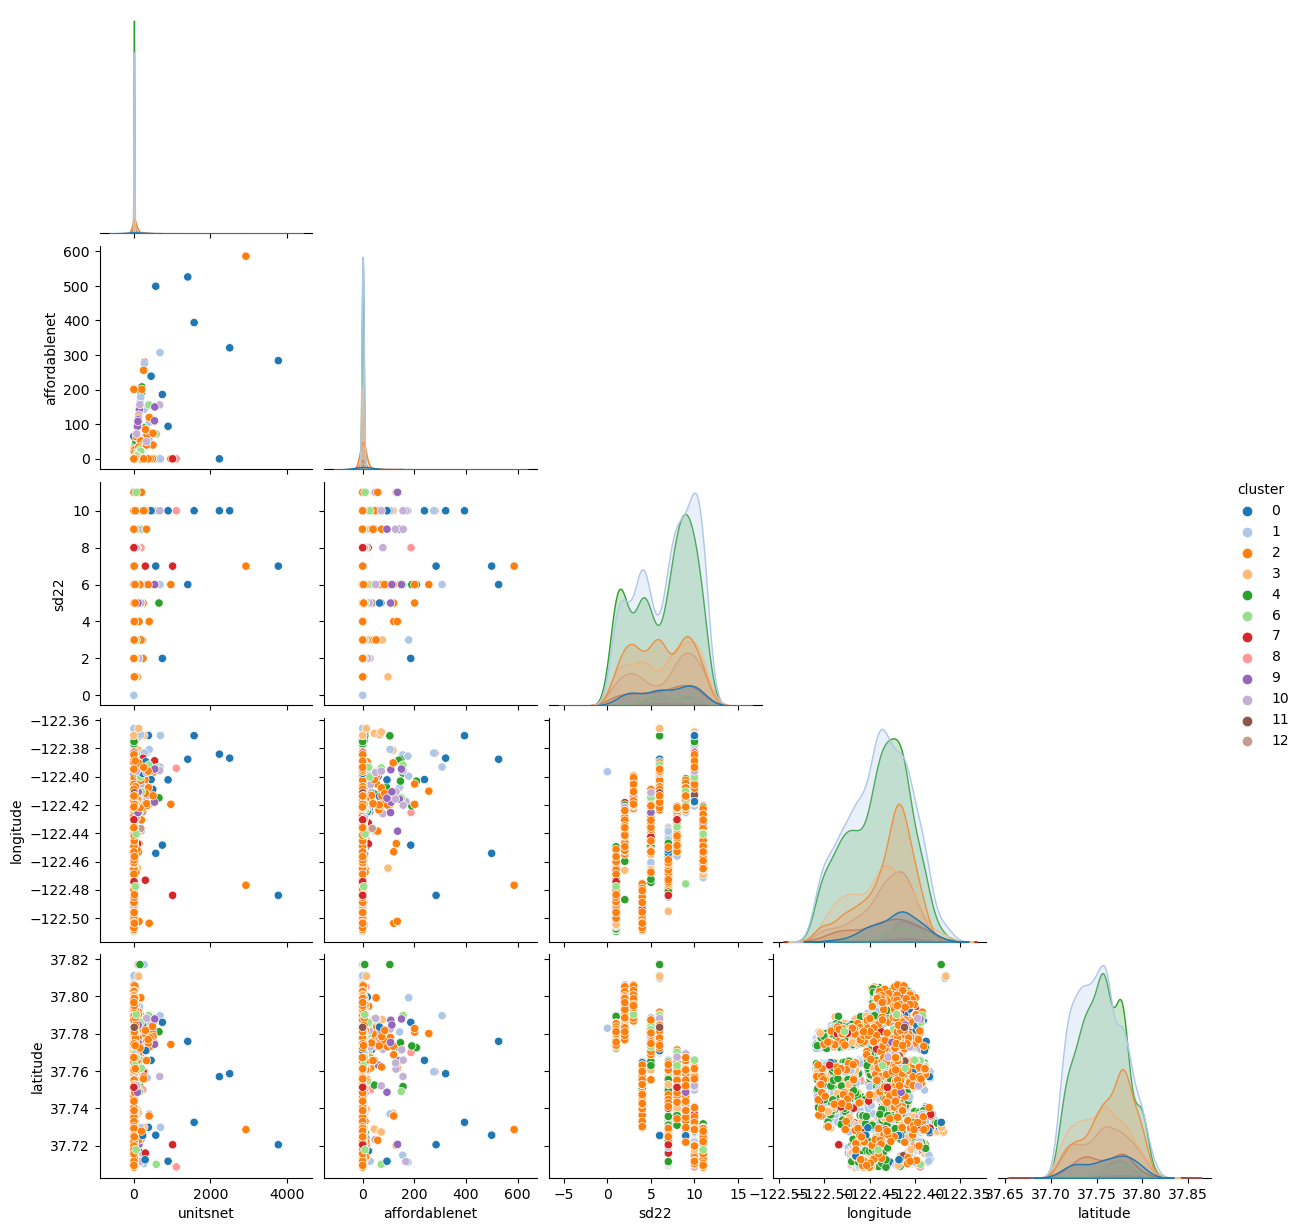

In [126]:
sns.pairplot(sf_dev_final[sf_dev_final['unitsnet'] < 5000], hue = 'cluster', palette = 'tab20', corner = True);

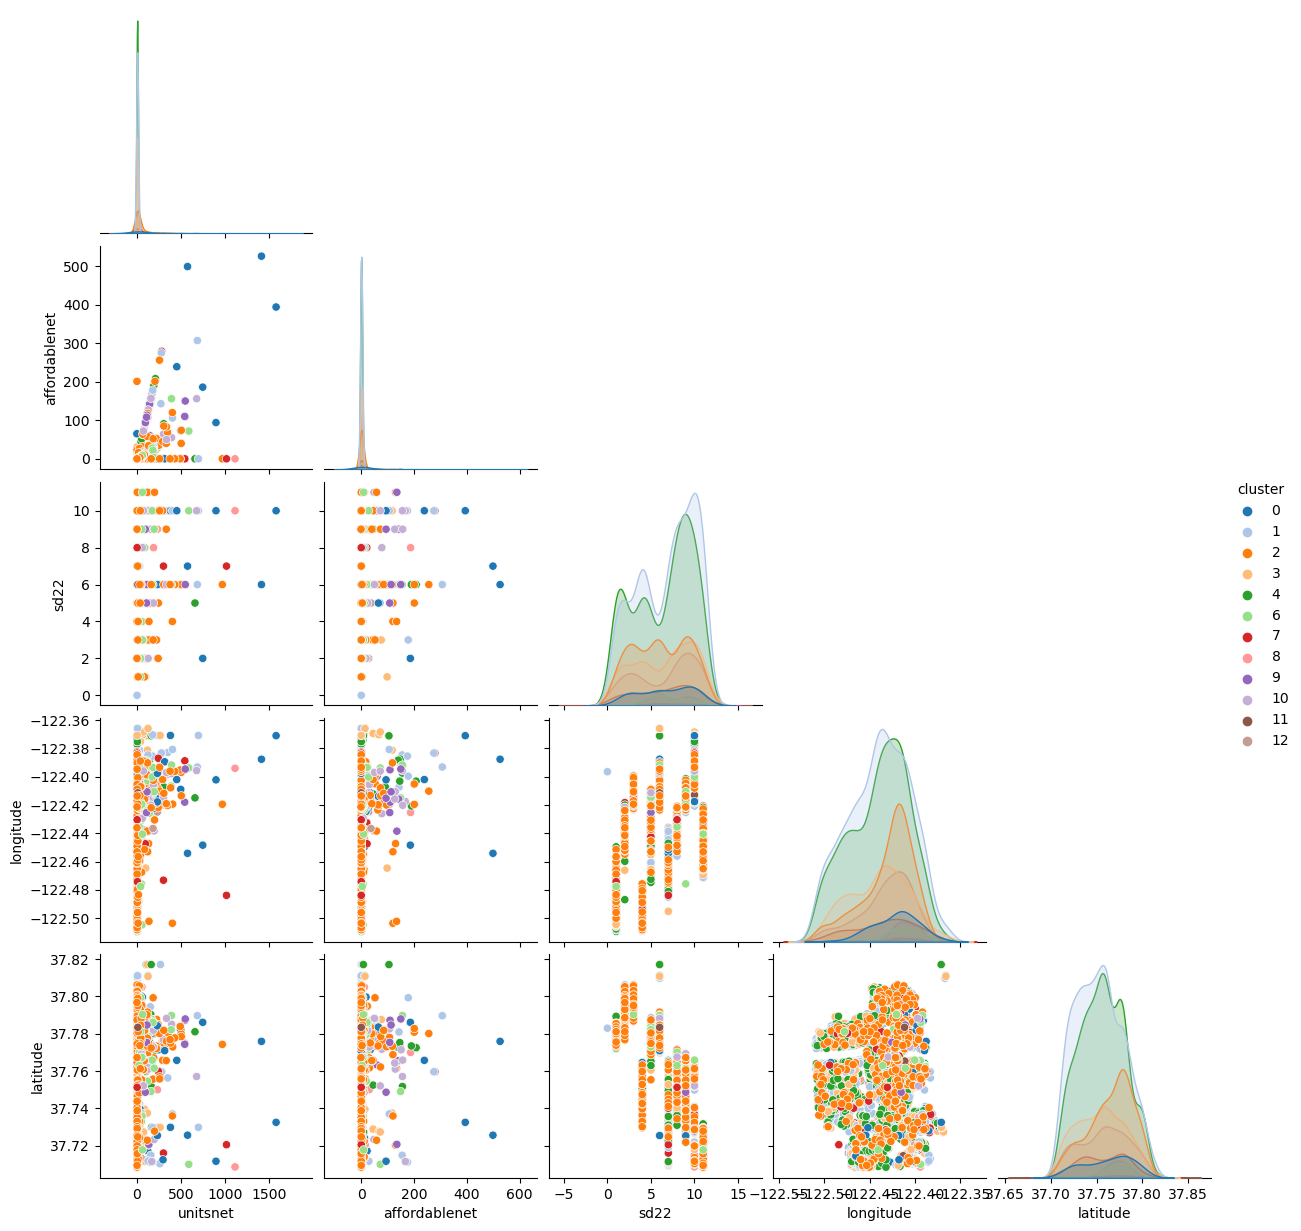

In [127]:
sns.pairplot(sf_dev_final[sf_dev_final['unitsnet'] < 2000], hue = 'cluster', palette = 'tab20', corner = True);

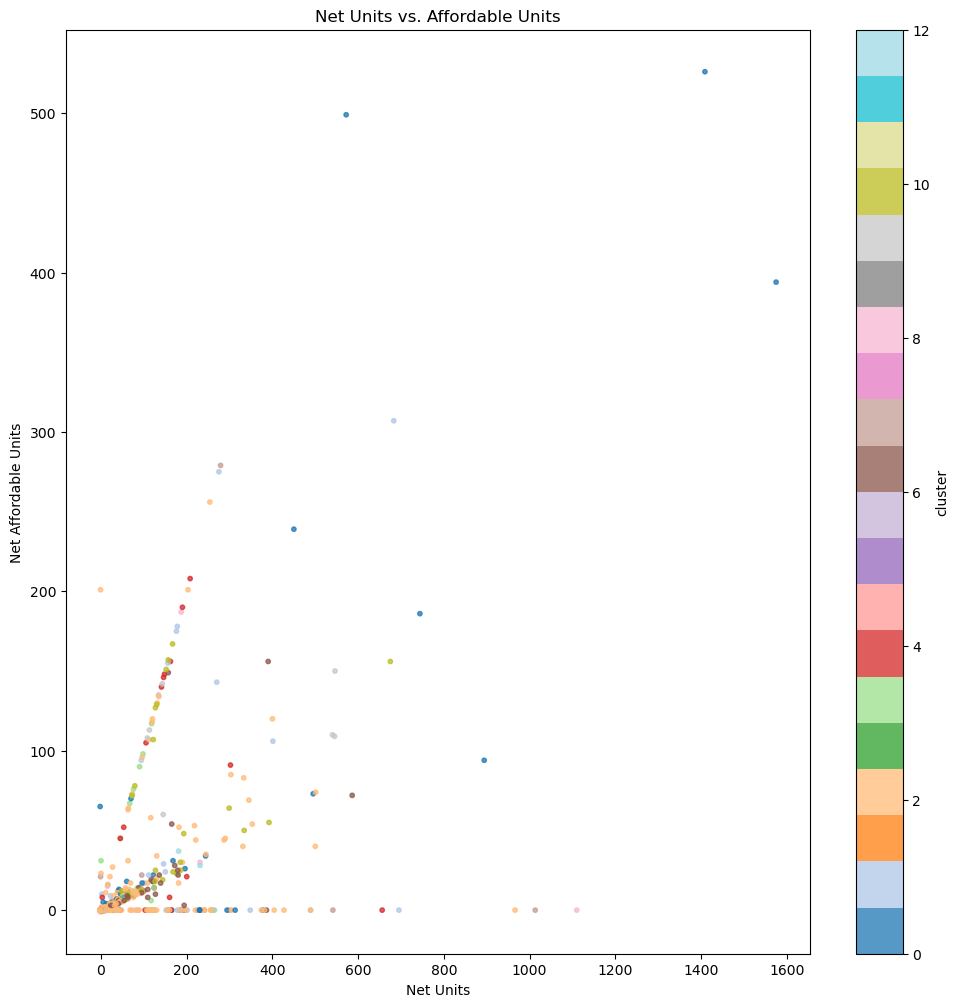

In [128]:
# display scatterplot of net units vs. affordable units
sf_dev_final[sf_dev_final['unitsnet'] < 2000].plot(kind="scatter", x="unitsnet", y="affordablenet", c="cluster",
         cmap="tab20", figsize=(12, 12), s=10, alpha = 0.75)

plt.xlabel('Net Units')
plt.ylabel('Net Affordable Units')
plt.title('Net Units vs. Affordable Units');

After multiple peeks into our exploratory data analysis, our clustering model unfortunately does not offer too many insights. Let us look at a few of our data visuals at a time and see what trends we can discern.

First, just looking at the cluster mapped out by latitude and longitude, we see almost no clear pattern in our 13 clusters at least not according to geography. Each of the clusters appear relatively geographically dispersed with concentrations in no particular area. This stands in constrast to the map of the supervisor districts in which there are of course clear boundaries, so the clusters in our final production model cross over potlical boundaries.

Next, looking at the geographic patterns of net units and net affordable units, we can see that the most numerous net units and net affordable units are occurring in projects on the Eastern edge of the city  with the exception of a few projects more central, and a couple in the southwest corner of the city. One very clear pattern though as we saw in our initial EDA is that the high net units coincide with the high net affordable units, so it continues to be a small share of projects which make up the overwhelming majority of the net units and net affordable units. Observing the most recent status of each project though there is no clear pattern or trend. Similar to what we saw in the location of clusters, the status of whether the planning department has approved, the building permit has been approved, or construction has begun seems dispersed across the city.

Where we do see some very clear patterns though are in land use and affordability targets. Both mixed land use projects and affordability targets show a strong pattern of co-occurring in the northeast quadrant of the city and to a lesser extent in the central Mission District neighborhood. These patterns are unsurprising given that these are the densest parts of the city, where most mixed residential projects tend to get proposed for walkable neighborhoods and commerce. These neighborhoods represent areas of socioeconomic diversity.

Lastly, there is little we can glean from our pairplots. Cluster 2 appears numerous and includes a lot of projects with zero net units and zero net affordable units. We zoomed in on our net units and net affordable units by eliminating our extreme outliers. When we zoom in we can see the cluster 6 follows that trend line about 10-15% net affordable units as a proportion of net units and clusters 9 and 10 follow that trend line of 90-100% net affordable units as a proprtion of net units. Perhaps most importantly after zooming in and eliminating the extreme outliers with the highest number of net units and net affordable units, cluster 5 disappears from our analysis entirely.

Perhaps then the most important takeaway is that we pay most attention to patterns in cluster 5, 9, and 10 which tend to follow these trends of a very large number of net affordable units or a high proportion of affordable to total net units.